In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
seed(1)
from matplotlib import style
style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [2]:
# conda install -c districtdatalabs yellowbrick

In [3]:
import tensorflow as tf

In [4]:
#!pip install nltk
import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('averaged_perceptron_tagger')
#nltk.download('tagsets')

# Read the CSV

In [5]:
data= pd.read_csv("mtsamples 4.csv", index_col=[0])
data

,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."
...,...,...,...,...,...
4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,Chronic Sinusitis,"HISTORY:, I had the pleasure of meeting and e...",NaN
4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,Kawasaki Disease - Discharge Summary,"ADMITTING DIAGNOSIS: , Kawasaki disease.,DISCH...","allergy / immunology, mucous membranes, conjun..."
4996,A female for a complete physical and follow u...,Allergy / Immunology,Followup on Asthma,"SUBJECTIVE: , This is a 42-year-old white fema...",NaN
4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,Asthma in a 5-year-old,"CHIEF COMPLAINT: , This 5-year-old male presen...",NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4998
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        4999 non-null   object
 1   medical_specialty  4999 non-null   object
 2   sample_name        4999 non-null   object
 3   transcription      4966 non-null   object
 4   keywords           3931 non-null   object
dtypes: object(5)
memory usage: 234.3+ KB


In [7]:
del data['keywords']

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4998
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        4999 non-null   object
 1   medical_specialty  4999 non-null   object
 2   sample_name        4999 non-null   object
 3   transcription      4966 non-null   object
dtypes: object(4)
memory usage: 195.3+ KB


In [9]:
data.isnull().sum()

description           0
medical_specialty     0
sample_name           0
transcription        33
dtype: int64

In [10]:
data= data.dropna(axis = 0, how ='any') 
data.sample(5)

,description,medical_specialty,sample_name,transcription
3287,"History of diabetes, osteoarthritis, atrial f...",General Medicine,H&P - Gen Med - 2,"HISTORY OF PRESENT ILLNESS:, The patient is a ..."
2592,Exam under anesthesia. Removal of intrauteri...,Obstetrics / Gynecology,Intrauterine Clots Removal,"PREOPERATIVE DIAGNOSIS: , Postpartum hemorrhag..."
1909,Template for History and Physical for a newborn.,Pediatrics - Neonatal,Normal Newborn H&P Template,"HISTORY OF PRESENT ILLNESS: , This is a ** wee..."
4934,Flexible Bronchoscopy (pediatric),Cardiovascular / Pulmonary,Bronchoscopy - Pediatric,"FLEXIBLE BRONCHOSCOPY,The flexible bronchoscop..."
3838,"Head injury, anxiety, and hypertensive emerge...",Emergency Room Reports,Head Injury,"CHIEF COMPLAINT:, Head injury.,HISTORY: , Thi..."


In [11]:
data.isnull().sum()

description          0
medical_specialty    0
sample_name          0
transcription        0
dtype: int64

In [12]:
data['transcription']=data['transcription'].astype('str')
data['transcription']

0       SUBJECTIVE:,  This 23-year-old white female pr...
1       PAST MEDICAL HISTORY:, He has difficulty climb...
2       HISTORY OF PRESENT ILLNESS: , I have seen ABC ...
3       2-D M-MODE: , ,1.  Left atrial enlargement wit...
4       1.  The left ventricular cavity size and wall ...
                              ...                        
4994    HISTORY:,  I had the pleasure of meeting and e...
4995    ADMITTING DIAGNOSIS: , Kawasaki disease.,DISCH...
4996    SUBJECTIVE: , This is a 42-year-old white fema...
4997    CHIEF COMPLAINT: , This 5-year-old male presen...
4998    HISTORY: , A 34-year-old male presents today s...
Name: transcription, Length: 4966, dtype: object

In [13]:
data['transcription'] = data['transcription'].str.lower()
data['transcription']

0       subjective:,  this 23-year-old white female pr...
1       past medical history:, he has difficulty climb...
2       history of present illness: , i have seen abc ...
3       2-d m-mode: , ,1.  left atrial enlargement wit...
4       1.  the left ventricular cavity size and wall ...
                              ...                        
4994    history:,  i had the pleasure of meeting and e...
4995    admitting diagnosis: , kawasaki disease.,disch...
4996    subjective: , this is a 42-year-old white fema...
4997    chief complaint: , this 5-year-old male presen...
4998    history: , a 34-year-old male presents today s...
Name: transcription, Length: 4966, dtype: object

In [14]:
# data['transcription'].replace(['#'], [' '], regex=True)

In [15]:
#getting rid of targeted charachters in the trascription
chars = ['#',':,',': ,',';','$','!','?','*','``','1. ', '2. ', '3. ', '4. ', '5. ','6. ','7. ','8. ','9. ','10. ']
for c in chars:
    data['transcription'] = data['transcription'].str.replace(c,"")

data.sample(5)

# chars = "\`*_{}[]()>#+-.,!$:;%'&/?"

,description,medical_specialty,sample_name,transcription
2870,Headache. Right frontal lobe glioma.,Neurology,Glioma - 2,"cc headache,hxy/o rhf presented to her local p..."
780,Cellulitis with associated abscess and foreig...,Surgery,Foreign Body Removal - Foot - 1,preoperative diagnoses cellulitis with associa...
3432,A 2-month-old female with 1-week history of c...,General Medicine,Congestion & Fever - 2-month-old,chief complaint a 2-month-old female with 1-w...
1645,Patient with a past medical history of a left...,Radiology,EMG/Nerve Conduction Study - 6,history the patient is a 46-year-old right-ha...
4938,Plastic piece foreign body in the right main...,Cardiovascular / Pulmonary,Bronchoscopy & Foreign Body Removal,preoperative diagnosis foreign body in airway....


In [16]:
#getting rid of targeted charachters in the trascription
chars = [",", ".", "[", "]", ":", "``", ")", "(", "1", "2", "5", "%", "3", "4", "4-0", "3-0", "6", "''", "0", "2-0", "8", "7", "&", "5-0", "9", "0.5", "1.5", "500", "50", "100", "6-0", "15", "2.5", "14-15", "60", "'", "300", "14", "________", "7-0", "90", "__________", "3.5", "1:100,000", "70", "0.", "80", "1:50,000", "03/08/200 ", "03/09/2007", "25605", "7.314", "33.0", "855.", "08/22/03", "10/500", "125.", "144/6"]
for c in chars:
    data['transcription'] = data['transcription'].str.replace(c," ")

data.sample(5)


,description,medical_specialty,sample_name,transcription
1983,Knee injection,Pain Management,Knee Injection,the patient was told that the injection may ca...
69,"The patient is a 16-month-old boy, who had a ...",Urology,Penile Cellulitis,chief complaint penile cellulitis status po...
757,"Removal of painful hardware, first left metat...",Surgery,Hardware Removal - Metatarsal,title of operation removal of painful hardware...
4546,"Left buttock abscess, status post incision an...",Consult - History and Phy.,Buttock Abscess,chief complaint buttock abscess history of pr...
1946,"1+ year, black female for initial evaluation ...",Pediatrics - Neonatal,Atopic Eczema,subjective this year black female new patie...


In [17]:
# Tokenizing 
from nltk.tokenize import word_tokenize

data['tokenized_sents'] = data['transcription'].apply(nltk.word_tokenize)
data.sample(5)

,description,medical_specialty,sample_name,transcription,tokenized_sents
1464,Followup of moderate-to-severe sleep apnea. ...,Sleep Medicine,Sleep Apnea,reason for visit mr abc is a -year-old man ...,"[reason, for, visit, mr, abc, is, a, -year-old..."
4028,"Removal of cystic lesion, removal of teeth, m...",Dentistry,Teeth Extraction,preoperative diagnoses basal cell nevus syndr...,"[preoperative, diagnoses, basal, cell, nevus, ..."
3640,Colonoscopy to screen for colon cancer,Gastroenterology,Colonoscopy - 6,indications this is a -year-old female who i...,"[indications, this, is, a, -year-old, female, ..."
502,Left facial cellulitis and possible odontogen...,Surgery,Odontogenic Abscess I&D,preoperative diagnoses left facial cellulitis ...,"[preoperative, diagnoses, left, facial, cellul..."
3569,The patient was brought to the OR with the kn...,Gastroenterology,Endovascular Abdominal Aortic Aneurysm Repair,preoperative diagnosis abdominal aortic aneury...,"[preoperative, diagnosis, abdominal, aortic, a..."


In [18]:
# data["tokenized_sents"] = data["tokenized_sents"].astype('str')

In [19]:
data["tokenized_sents"][0][0]

'subjective'

In [20]:
from nltk import pos_tag

In [21]:
nltk.tag.pos_tag(data["tokenized_sents"][0])

[('subjective', 'NN'),
 ('this', 'DT'),
 ('-year-old', 'JJ'),
 ('white', 'JJ'),
 ('female', 'NN'),
 ('presents', 'NNS'),
 ('with', 'IN'),
 ('complaint', 'NN'),
 ('of', 'IN'),
 ('allergies', 'NNS'),
 ('she', 'PRP'),
 ('used', 'VBD'),
 ('to', 'TO'),
 ('have', 'VB'),
 ('allergies', 'NNS'),
 ('when', 'WRB'),
 ('she', 'PRP'),
 ('lived', 'VBD'),
 ('in', 'IN'),
 ('seattle', 'NN'),
 ('but', 'CC'),
 ('she', 'PRP'),
 ('thinks', 'VBZ'),
 ('they', 'PRP'),
 ('are', 'VBP'),
 ('worse', 'JJR'),
 ('here', 'RB'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('past', 'JJ'),
 ('she', 'PRP'),
 ('has', 'VBZ'),
 ('tried', 'VBN'),
 ('claritin', 'NN'),
 ('and', 'CC'),
 ('zyrtec', 'NN'),
 ('both', 'DT'),
 ('worked', 'VBD'),
 ('for', 'IN'),
 ('short', 'JJ'),
 ('time', 'NN'),
 ('but', 'CC'),
 ('then', 'RB'),
 ('seemed', 'VBD'),
 ('to', 'TO'),
 ('lose', 'VB'),
 ('effectiveness', 'NN'),
 ('she', 'PRP'),
 ('has', 'VBZ'),
 ('used', 'VBN'),
 ('allegra', 'NN'),
 ('also', 'RB'),
 ('she', 'PRP'),
 ('used', 'VBD'),
 ('that', 'IN'),
 (

In [22]:
data['POSTags'] = data['tokenized_sents'].apply(pos_tag)

In [23]:
data['POSTags'].head()

0    [(subjective, NN), (this, DT), (-year-old, JJ)...
1    [(past, JJ), (medical, JJ), (history, NN), (he...
2    [(history, NN), (of, IN), (present, JJ), (illn...
3    [(-d, JJ), (m-mode, NN), (left, VBD), (atrial,...
4    [(the, DT), (left, NN), (ventricular, JJ), (ca...
Name: POSTags, dtype: object

In [24]:
# type(data['POSTags'].to_list())

In [25]:
# test =data['POSTags'].to_list()
# type(test)


In [26]:
# from yellowbrick.text import PosTagVisualizer

# # Create the visualizer, fit, score, and show it
# viz = PosTagVisualizer()
# viz.fit(test[0])
# viz.show()

In [27]:
# Selecting the nouns in our corpus
data['Nouns'] = data['POSTags'].apply(lambda x: [(t[0], t[1]) for t in x if t[1]=='NN' or t[1]=='NNP' or t[1]=='NNS' or t[1]=='NNPS'])

data['Nouns']

0       [(subjective, NN), (female, NN), (presents, NN...
1       [(history, NN), (difficulty, NN), (stairs, NNS...
2       [(history, NN), (illness, NN), (i, NN), (abc, ...
3       [(m-mode, NN), (enlargement, NN), (diameter, N...
4       [(left, NN), (cavity, NN), (size, NN), (wall, ...
                              ...                        
4994    [(history, NN), (i, NN), (pleasure, NN), (meet...
4995    [(diagnosis, NN), (kawasaki, NN), (disease, NN...
4996    [(subjective, NN), (female, NN), (today, NN), ...
4997    [(complaint, NN), (male, NN), (presents, NNS),...
4998    [(history, NN), (male, NN), (presents, NNS), (...
Name: Nouns, Length: 4966, dtype: object

In [28]:
to_be_lemmatized = []

for nouns_per_medical_specialties in data['Nouns']:
    
    
    words2lemmatied = []
    for word in nouns_per_medical_specialties:
        words2lemmatied.append(word[0])
    
    to_be_lemmatized.append(words2lemmatied)


data['to_be_lemmatized'] = to_be_lemmatized
data['to_be_lemmatized']

0       [subjective, female, presents, complaint, alle...
1       [history, difficulty, stairs, difficulty, airl...
2       [history, illness, i, abc, today, gentleman, y...
3       [m-mode, enlargement, diameter, cm, size, righ...
4       [left, cavity, size, wall, thickness, wall, mo...
                              ...                        
4994    [history, i, pleasure, meeting, patient, today...
4995    [diagnosis, kawasaki, disease, discharge, diag...
4996    [subjective, female, today, physical, asthma, ...
4997    [complaint, male, presents, children, hospital...
4998    [history, male, presents, today, recommendatio...
Name: to_be_lemmatized, Length: 4966, dtype: object

In [29]:
from nltk.stem import WordNetLemmatizer

lmtzr = WordNetLemmatizer()

# print("rocks :", lmtzr.lemmatize("rocks"))

# for dd in data['to_be_lemmatized']:
#     lemma = lmtzr.lemmatize(dd[0])
#     print("%s Lemma:%s" %(dd[0], lemma))
data['lemmatize'] = data['to_be_lemmatized'].apply(lambda lst:[lmtzr.lemmatize(word) for word in lst])
print(data['lemmatize'])

# data['to_be_lemmatized'].apply(lambda lst:[lmtzr.lemmatize(word) for word in lst])



0       [subjective, female, present, complaint, aller...
1       [history, difficulty, stair, difficulty, airli...
2       [history, illness, i, abc, today, gentleman, y...
3       [m-mode, enlargement, diameter, cm, size, righ...
4       [left, cavity, size, wall, thickness, wall, mo...
                              ...                        
4994    [history, i, pleasure, meeting, patient, today...
4995    [diagnosis, kawasaki, disease, discharge, diag...
4996    [subjective, female, today, physical, asthma, ...
4997    [complaint, male, present, child, hospital, em...
4998    [history, male, present, today, recommendation...
Name: lemmatize, Length: 4966, dtype: object


In [30]:
data.sample(5)

,description,medical_specialty,sample_name,transcription,tokenized_sents,POSTags,Nouns,to_be_lemmatized,lemmatize
2990,The patient is admitted with a diagnosis of a...,Nephrology,Nephrology Consultation - 4,history the patient is a -year-old male pati...,"[history, the, patient, is, a, -year-old, male...","[(history, NN), (the, DT), (patient, NN), (is,...","[(history, NN), (patient, NN), (patient, NN), ...","[history, patient, patient, i, patient, blood,...","[history, patient, patient, i, patient, blood,..."
3186,Excisional biopsy of right cervical lymph node.,Hematology - Oncology,Biopsy - Cervical Lymph Node,preoperative diagnosis cervical lymphadenopath...,"[preoperative, diagnosis, cervical, lymphadeno...","[(preoperative, JJ), (diagnosis, NN), (cervica...","[(diagnosis, NN), (diagnosis, NN), (procedure,...","[diagnosis, diagnosis, procedure, biopsy, lymp...","[diagnosis, diagnosis, procedure, biopsy, lymp..."
2560,Bilateral breast MRI with & without IV contrast.,Obstetrics / Gynecology,MRI Breast - 1,findingsthere are post biopsy changes seen in ...,"[findingsthere, are, post, biopsy, changes, se...","[(findingsthere, RB), (are, VBP), (post, JJ), ...","[(biopsy, NN), (changes, NNS), (region, NN), (...","[biopsy, changes, region, aspect, left, breast...","[biopsy, change, region, aspect, left, breast,..."
655,Microscopic-assisted revision of bilateral de...,Surgery,Laminectomy & Foraminotomy Revision,preoperative diagnoses recurrent spinal stenos...,"[preoperative, diagnoses, recurrent, spinal, s...","[(preoperative, JJ), (diagnoses, NNS), (recurr...","[(diagnoses, NNS), (stenosis, NN), (l, NN), (-...","[diagnoses, stenosis, l, -ll, -land, l, -s, sp...","[diagnosis, stenosis, l, -ll, -land, l, -s, sp..."
4864,Abnormal EKG and rapid heart rate. The patie...,Cardiovascular / Pulmonary,Consult - Abnormal EKG,reason for consultation abnormal ekg and rapid...,"[reason, for, consultation, abnormal, ekg, and...","[(reason, NN), (for, IN), (consultation, NN), ...","[(reason, NN), (consultation, NN), (ekg, NN), ...","[reason, consultation, ekg, heart, rate, histo...","[reason, consultation, ekg, heart, rate, histo..."


In [31]:
print(data['lemmatize'])

0       [subjective, female, present, complaint, aller...
1       [history, difficulty, stair, difficulty, airli...
2       [history, illness, i, abc, today, gentleman, y...
3       [m-mode, enlargement, diameter, cm, size, righ...
4       [left, cavity, size, wall, thickness, wall, mo...
                              ...                        
4994    [history, i, pleasure, meeting, patient, today...
4995    [diagnosis, kawasaki, disease, discharge, diag...
4996    [subjective, female, today, physical, asthma, ...
4997    [complaint, male, present, child, hospital, em...
4998    [history, male, present, today, recommendation...
Name: lemmatize, Length: 4966, dtype: object


In [32]:
type(data['lemmatize'])

pandas.core.series.Series

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4966 entries, 0 to 4998
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        4966 non-null   object
 1   medical_specialty  4966 non-null   object
 2   sample_name        4966 non-null   object
 3   transcription      4966 non-null   object
 4   tokenized_sents    4966 non-null   object
 5   POSTags            4966 non-null   object
 6   Nouns              4966 non-null   object
 7   to_be_lemmatized   4966 non-null   object
 8   lemmatize          4966 non-null   object
dtypes: object(9)
memory usage: 548.0+ KB


In [34]:
len(data['lemmatize'][1])


129

In [35]:
data['lemmatize_count'] = data['lemmatize'].astype('str')
data['lemmatize_count']=data['lemmatize_count'].str.split().str.len()

In [36]:
data.sample(5)

,description,medical_specialty,sample_name,transcription,tokenized_sents,POSTags,Nouns,to_be_lemmatized,lemmatize,lemmatize_count
2519,Ultrasound OB - followup for fetal growth.,Obstetrics / Gynecology,Ultrasound OB,reason for exam followup for fetal growth ...,"[reason, for, exam, followup, for, fetal, grow...","[(reason, NN), (for, IN), (exam, NN), (followu...","[(reason, NN), (exam, NN), (followup, NN), (gr...","[reason, exam, followup, growth, interpretatio...","[reason, exam, followup, growth, interpretatio...",70
3362,Patient in with mom for possible ear infection.,General Medicine,Gen Med Consult - 23,subjective mom brings the patient in today fo...,"[subjective, mom, brings, the, patient, in, to...","[(subjective, JJ), (mom, NN), (brings, VBZ), (...","[(mom, NN), (patient, NN), (today, NN), (infec...","[mom, patient, today, infection, ear, pain, to...","[mom, patient, today, infection, ear, pain, to...",81
3658,"Colonoscopy due to rectal bleeding, constipat...",Gastroenterology,Colonoscopy - 1,indication rectal bleeding constipation abn...,"[indication, rectal, bleeding, constipation, a...","[(indication, NN), (rectal, NN), (bleeding, VB...","[(indication, NN), (rectal, NN), (constipation...","[indication, rectal, constipation, ct, rule, i...","[indication, rectal, constipation, ct, rule, i...",12
30,The patient noted for improving retention of ...,Urology,Urinary Retention - Followup,history of present illness the patient present...,"[history, of, present, illness, the, patient, ...","[(history, NN), (of, IN), (present, JJ), (illn...","[(history, NN), (illness, NN), (patient, NN), ...","[history, illness, patient, presents, today, f...","[history, illness, patient, present, today, fo...",57
3579,EGD with dilation for dysphagia.,Gastroenterology,EGD with Dilation,indication,[indication],"[(indication, NN)]","[(indication, NN)]",[indication],[indication],1


In [37]:
del data['to_be_lemmatized']
del data['sample_name']

In [38]:
data.sample(5)

,description,medical_specialty,transcription,tokenized_sents,POSTags,Nouns,lemmatize,lemmatize_count
239,Insertion of transesophageal echocardiography...,Surgery,indications for procedure impending open hear...,"[indications, for, procedure, impending, open,...","[(indications, NNS), (for, IN), (procedure, NN...","[(indications, NNS), (procedure, NN), (heart, ...","[indication, procedure, heart, surgery, closur...",97
3596,Patient with a history of a Nissen fundoplica...,Gastroenterology,admitting diagnoses hiatal hernia gastroesop...,"[admitting, diagnoses, hiatal, hernia, gastroe...","[(admitting, VBG), (diagnoses, NNS), (hiatal, ...","[(diagnoses, NNS), (hernia, NN), (gastroesopha...","[diagnosis, hernia, gastroesophageal, reflux, ...",140
546,Right nodular malignant mesothelioma.,Surgery,preoperative diagnosis right mesothelioma po...,"[preoperative, diagnosis, right, mesothelioma,...","[(preoperative, JJ), (diagnosis, NN), (right, ...","[(diagnosis, NN), (diagnosis, NN), (lung, NN),...","[diagnosis, diagnosis, lung, mass, diaphragm, ...",252
3009,Acute on chronic renal failure and uremia. I...,Nephrology,preoperative diagnoses acute on chronic renal ...,"[preoperative, diagnoses, acute, on, chronic, ...","[(preoperative, JJ), (diagnoses, NNS), (acute,...","[(diagnoses, NNS), (failure, NN), (diagnoses, ...","[diagnosis, failure, diagnosis, failure, proce...",91
732,Construction of right upper arm hemodialysis ...,Surgery,preoperative diagnosis end-stage renal disease...,"[preoperative, diagnosis, end-stage, renal, di...","[(preoperative, JJ), (diagnosis, NN), (end-sta...","[(diagnosis, NN), (disease, NN), (dialysis, NN...","[diagnosis, disease, dialysis, fistula, diagno...",113


In [39]:
data.reset_index(drop=True)


,description,medical_specialty,transcription,tokenized_sents,POSTags,Nouns,lemmatize,lemmatize_count
0,A 23-year-old white female presents with comp...,Allergy / Immunology,subjective this -year-old white female pres...,"[subjective, this, -year-old, white, female, p...","[(subjective, NN), (this, DT), (-year-old, JJ)...","[(subjective, NN), (female, NN), (presents, NN...","[subjective, female, present, complaint, aller...",49
1,Consult for laparoscopic gastric bypass.,Bariatrics,past medical history he has difficulty climbin...,"[past, medical, history, he, has, difficulty, ...","[(past, JJ), (medical, JJ), (history, NN), (he...","[(history, NN), (difficulty, NN), (stairs, NNS...","[history, difficulty, stair, difficulty, airli...",129
2,Consult for laparoscopic gastric bypass.,Bariatrics,history of present illness i have seen abc tod...,"[history, of, present, illness, i, have, seen,...","[(history, NN), (of, IN), (present, JJ), (illn...","[(history, NN), (illness, NN), (i, NN), (abc, ...","[history, illness, i, abc, today, gentleman, y...",213
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,-d m-mode left atrial enlargement with left...,"[-d, m-mode, left, atrial, enlargement, with, ...","[(-d, JJ), (m-mode, NN), (left, VBD), (atrial,...","[(m-mode, NN), (enlargement, NN), (diameter, N...","[m-mode, enlargement, diameter, cm, size, righ...",22
4,2-D Echocardiogram,Cardiovascular / Pulmonary,the left ventricular cavity size and wall thi...,"[the, left, ventricular, cavity, size, and, wa...","[(the, DT), (left, NN), (ventricular, JJ), (ca...","[(left, NN), (cavity, NN), (size, NN), (wall, ...","[left, cavity, size, wall, thickness, wall, mo...",65
...,...,...,...,...,...,...,...,...
4961,Patient having severe sinusitis about two to ...,Allergy / Immunology,history i had the pleasure of meeting and eva...,"[history, i, had, the, pleasure, of, meeting, ...","[(history, NN), (i, NN), (had, VBD), (the, DT)...","[(history, NN), (i, NN), (pleasure, NN), (meet...","[history, i, pleasure, meeting, patient, today...",245
4962,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,admitting diagnosis kawasaki disease discharg...,"[admitting, diagnosis, kawasaki, disease, disc...","[(admitting, VBG), (diagnosis, NN), (kawasaki,...","[(diagnosis, NN), (kawasaki, NN), (disease, NN...","[diagnosis, kawasaki, disease, discharge, diag...",79
4963,A female for a complete physical and follow u...,Allergy / Immunology,subjective this is a -year-old white female ...,"[subjective, this, is, a, -year-old, white, fe...","[(subjective, NN), (this, DT), (is, VBZ), (a, ...","[(subjective, NN), (female, NN), (today, NN), ...","[subjective, female, today, physical, asthma, ...",185
4964,Mother states he has been wheezing and coughing.,Allergy / Immunology,chief complaint this -year-old male presents ...,"[chief, complaint, this, -year-old, male, pres...","[(chief, JJ), (complaint, NN), (this, DT), (-y...","[(complaint, NN), (male, NN), (presents, NNS),...","[complaint, male, present, child, hospital, em...",136


In [40]:
# REACH GOAL
# from nltk.tokenize import sent_tokenize
# data["sent_token"] = data["transcription"].apply(lambda x: sent_tokenize(x))


In [41]:
from collections import Counter
dictionary= data['lemmatize'].transform(lambda x: Counter(x)).sum()
dictionary

for k in sorted(dictionary, key=dictionary.get, reverse=True):
    print(k, dictionary[k])

patient 23378
history 9438
procedure 7791
pain 5444
time 4927
/ 4878
i 4675
diagnosis 4522
incision 3905
blood 3803
room 3497
s 3329
day 3325
artery 3162
area 3091
skin 2939
medication 2765
mg 2757
suture 2744
extremity 2718
disease 2631
position 2630
tissue 2536
left 2490
pressure 2479
fashion 2441
x 2404
anesthesia 2311
surgery 2151
heart 2124
mass 2120
condition 2083
evidence 2075
examination 2057
operating 2055
abdomen 2022
muscle 1992
neck 1990
week 1987
lesion 1978
side 1973
catheter 1966
year 1926
complication 1889
level 1874
sign 1857
vicryl 1824
wound 1796
loss 1791
family 1759
risk 1746
care 1739
nerve 1733
symptom 1706
rate 1660
p 1652
head 1628
finding 1628
system 1607
eye 1597
change 1583
foot 1576
bone 1572
right 1548
dissection 1505
tube 1485
dr 1473
point 1461
plan 1459
problem 1458
difficulty 1448
bladder 1436
none 1403
lung 1397
treatment 1382
status 1376
cm 1364
today 1358
exam 1357
female 1351
chest 1340
hospital 1332
site 1328
bowel 1321
knee 1300
evaluation 1296
v

name 147
station 147
collateral 147
observation 147
dizziness 147
tachycardia 147
prophylaxis 146
med 146
monitor 146
esmarch 146
entry 146
dementia 146
enlargement 145
pad 145
december 145
duodenum 144
naris 144
mixture 144
flexor 144
lymphadenopathy 143
mattress 143
transfer 143
score 143
dysuria 142
iron 142
velocity 142
adenopathy 141
dysphagia 141
ulceration 141
emg 141
surgeon 140
implantation 140
periosteum 140
interpretation 140
effort 140
tylenol 139
transplant 139
mucosal 139
qd 139
sample 138
loop 138
sweat 138
endoscope 138
osteoarthritis 137
roll 137
drape 137
’ 137
hemorrhoid 136
index 136
preparation 136
relief 136
extraction 136
rupture 136
immunization 135
dialysis 135
labor 135
pigtail 135
genitalia 134
mi 134
prominence 134
splint 134
ointment 133
liquid 133
tomorrow 133
fiber 133
nonsmoker 133
hepatosplenomegaly 133
rale 132
window 132
infusion 132
gradient 131
arch 131
word 131
cn 131
identification 131
prognosis 131
oximetry 131
decubitus 131
rim 131
bronchus 130


waist 62
oil 62
brevis 62
penetration 62
-cand 62
session 62
magnesium 62
postprocedure 61
blake 61
connection 61
dorsum 61
serum 61
chief 61
albumin 61
firm 61
adnexa 61
autograft 61
mediastinum 61
tuberosity 61
house 61
adenoma 61
egd 61
infiltrate 61
inhibitor 61
mesothelioma 61
milk 61
comprehension 61
gain 60
load 60
etc 60
crest 60
vertigo 60
palsy 60
levaquin 60
vancomycin 60
k 60
cauterization 60
articulation 60
lift 60
tonsillectomy 60
steel 60
wrap 60
scoliosis 60
displacement 60
excursion 60
pedis 60
pullback 60
lv 60
tolerance 60
tibialis 60
bue 60
cirrhosis 59
scarpa 59
contracture 59
functioning 59
chemistry 59
hydrocephalus 59
cath 59
_______ 59
myringotomy 59
adenoid 59
eminence 59
cart 59
cocaine 59
wheelchair 59
tingling 59
hematemesis 59
sprain 59
delusion 59
rheumatoid 58
adjustment 58
dissector 58
icterus 58
computer 58
absence 58
-gauge 58
communication 58
mean 58
everything 58
shock 58
hypokinesis 58
lymphocyte 58
gastritis 58
moment 58
tia 58
mm/dd/yyyy 58
posto

pcp 29
comminution 29
-inch 29
arteriogram 29
mental 29
error 29
proprioception 29
flonase 29
hepatomegaly 29
mcv 29
gabapentin 29
impact 29
pnd 29
bpm 29
bathroom 29
lithium 29
rpr 29
tachypnea 29
spike 28
security 28
dorsi 28
boyfriend 28
anger 28
mca 28
tubing 28
alteration 28
ridge 28
stream 28
pyelogram 28
ta 28
xand 28
plexus 28
modification 28
pleasure 28
locking 28
ebl 28
polyuria 28
sling 28
stockinette 28
sclera 28
uterine 28
olecranon 28
lash 28
chamfer 28
synovium 28
fasciotomy 28
exit 28
argon 28
gastroenteritis 28
beach 28
hank 28
interest 28
conduit 28
hamstring 28
boston 28
intensification 28
lvedp 28
virus 28
mrsa 28
lima 28
photophobia 28
coarctation 28
lipid 28
community 28
eoms 28
dermatitis 28
zoloft 28
levothyroxine 28
rle 28
perception 28
ou 28
diff 28
nebulizer 28
summer 27
flight 27
sizer 27
scrub 27
hemoclips 27
meeting 27
duplex 27
flu 27
bookwalter 27
stoma 27
padding 27
mosquito 27
hope 27
collecting 27
bactrim 27
embolus 27
hump 27
burning 27
varix 27
anal

caudate 18
dark 18
w 18
cricoid 18
outside 18
harvesting 18
al 18
violation 18
determination 18
pharyngitis 18
significance 18
-degree 18
morbidity 18
superior 18
processus 18
adherence 18
parker 18
balfour 18
employment 18
classification 18
____ 18
okay 18
wydase 18
attending 18
phlebectomy 18
weitlaner 18
stretch 18
exsanguination 18
mole 18
hulka 18
echocardiography 18
style 18
insert 18
spatula 18
electrocoagulation 18
nexgen 18
ware 18
rotators 18
necessity 18
stand 18
cricothyroid 18
hypoglossal 18
marginal 18
atrial 18
stainless 18
pro 18
ten 18
hyoid 18
spreader 18
tobradex 18
orbicularis 18
smk 18
calm 18
tetracaine 18
sweep 18
cystotome 18
interscalene 18
capsuloperiosteal 18
bier 18
mandibular 18
trajectory 18
glue 18
microdebrider 18
pci 18
mammoplasty 18
wilson 18
lland 18
metacarpal 18
endocrinology 18
ssep 18
gp 18
hemicolectomy 18
scanner 18
parapharyngeal 18
solid 18
cccand 18
radiating 18
pseudomeningocele 18
cetacaine 18
pco 18
integra 18
diltiazem 18
valium 18
diffe

powder 13
stimulus 13
adhd 13
february 13
dryness 13
cozaar 13
cea 13
juice 13
craniopharyngioma 13
orthopedist 13
rf 13
girlfriend 13
mmol/l 13
synchondrosis 13
brachium 13
fluctuation 13
systolic 13
variation 13
convulsion 13
aura 13
alcoholism 13
telephone 13
finance 13
peer 13
trileptal 13
mg/ 13
weighs 13
gingiva 13
temodar 13
prograf 13
anticoagulant 13
eater 12
ii-xii 12
ideal 12
treitz 12
potts 12
deferens 12
sterility 12
prothrombin 12
tur 12
fill 12
void 12
fulguration 12
retropubic 12
colic 12
indicating 12
advance 12
denonvilliers 12
max 12
pyelotomy 12
vascularity 12
tennis 12
connector 12
officer 12
vaginitis 12
kitner 12
turbid 12
introitus 12
hood 12
genital 12
unsure 12
string 12
pull-back 12
kenalog 12
tcompression 12
atropine 12
tympanostomy 12
coag 12
malleus 12
tympanoplasty 12
jig 12
extreme 12
methacrylate 12
zimmer 12
medius 12
cookie 12
rock 12
expander 12
expiration 12
pledget 12
plaster 12
baseball 12
synovectomy 12
phalangeal 12
lock 12
tunneling 12
peridex 

ultrasonography 9
whole 9
cleavage 9
down 9
methylene 9
radiolucent 9
re-exploration 9
microtechniques 9
abg 9
histologic 9
danger 9
neuroforamen 9
cauda 9
equina 9
concavity 9
-month 9
bearing 9
noise 9
podiatry 9
durotomy 9
complement 9
staining 9
forefoot 9
ward 9
rescue 9
asynchrony 9
arthrogram 9
breech 9
pretarsal 9
lamella 9
erythromycin 9
azygos 9
sarcoma 9
astrocytoma 9
tag 9
blistering 9
tampon 9
indeterminate 9
lorenz 9
residual 9
adequacy 9
aggregate 9
efficiency 9
objective 9
jowl 9
micropore 9
sideburn 9
frontalis 9
shin 9
broviac 9
productive 9
programming 9
re-evaluation 9
cranial 9
deposition 9
pioneer 9
bengal 9
-cthen 9
caspar 9
-cwe 9
tongs 9
cand 9
imbalance 9
taxol 9
cracker 9
thrombocytosis 9
addiction 9
prolongation 9
rem 9
/mg 9
plaquenil 9
ritalin 9
tibc 9
iowa 9
spider 9
streak 9
mononeuritis 9
multiplex 9
hydroxyzine 9
everyday 9
glucophage 9
azotemia 9
homicidal 9
-calorie 9
eczema 9
-hour 9
midnight 9
warning 9
lvh 9
effexor 9
dream 9
teen 9
compatible 9
c

cornerstone 6
-cgreater 6
discectomies 6
-cwith 6
omohyoid 6
interference 6
zephyr 6
structural 6
platysmus 6
mystique 6
overgrowth 6
cloward 6
peritenon 6
domain 6
spent 6
xy 6
subtest 6
abdominus 6
maze 6
protuberant 6
wasp 6
tossing 6
disarray 6
arise 6
actonel 6
pseudoaneurysm 6
reticulocyte 6
sock 6
pex 6
prison 6
dp 6
clue 6
contin 6
hypoventilation 6
mantle 6
omnicef 6
vasotec 6
radiates 6
wichita 6
discus 6
requip 6
hypertriglyceridemia 6
metronidazole 6
erythematosus 6
atarax 6
obstipation 6
heaviness 6
b/p 6
carrot 6
vomit 6
celery 6
pedialyte 6
papule 6
myofascitis 6
watcher 6
crepitance 6
emphasis 6
exercising 6
prepregnancy 6
sunburn 6
soapy 6
bactroban 6
watch 6
stable 6
francisco 6
departure 6
podiatrist 6
tmj 6
tenormin 6
birthday 6
scleritis 6
wean 6
mouthwash 6
munson 6
varner 6
classroom 6
toy 6
antivert 6
drooping 6
depletion 6
pancytopenia 6
alpha 6
drowsy 6
everybody 6
excoriation 6
shingle 6
edd 6
biometrybpd 6
grayscale 6
biometry 6
caliectasis 6
broadening 6
pl

supra-dartos 4
grenade 4
viability 4
perfix 4
disfigurement 4
spongiosum 4
buck 4
neomeatus 4
byers 4
hydrocelectomy 4
cbi 4
impediment 4
pipeline 4
hpv 4
escherichia 4
electrofulguration 4
bugbee 4
lasting 4
diagnoseshematuria 4
softening 4
cystoscopies 4
offset 4
cystolithotripsy 4
cystoprostatectomy 4
hdr 4
gynecomastia 4
impotency 4
mogen 4
stay-stitch 4
elastoplast 4
xhours 4
cavernosum 4
gamco 4
grid 4
avodart 4
hematologic/lymphatic 4
somewhat 4
rigidus 4
aldosterone 4
indicator 4
iopidine 4
bioarc 4
xenograft 4
superonasal 4
cme 4
tpedicle 4
vvir 4
pipe 4
ophthalmoscope 4
skirt 4
akinesia 4
neuropen 4
macrocephaly 4
rumi 4
portio 4
ldr 4
-week 4
antebrachial 4
flexor-pronator 4
penny 4
hypotony 4
his/her 4
tg 4
myringosclerosis 4
titanium-porp 4
merocel 4
elli 4
triggering 4
claw 4
freeing 4
-in- 4
bv 4
centering 4
trochlea 4
mcgill 4
cementation 4
xabds 4
cobalt 4
cobra 4
chosen 4
acetabular 4
hollow 4
toronto 4
u-stitch 4
vasopressin 4
watt 4
elongation 4
bayonet 4
aortotomy 

malodor 3
katzman 3
verification 3
interruption 3
thrive 3
in-charge 3
yueh 3
-gauze 3
asystole 3
internus 3
nasotracheal 3
harleton 3
abuser 3
cfd 3
deepening 3
ett 3
papillary 3
kopans 3
epidermis 3
mucoid 3
transconjunctival 3
performer 3
publicity 3
promotion 3
cheekbone 3
singer 3
jaeger 3
q-tip 3
pseudofat 3
lacri-lube 3
whitnall 3
masseter 3
can 3
sano 3
ventriculotomy 3
mcbride 3
sesamoidal 3
buildup 3
cascading 3
protective 3
decussation 3
vertebroplasty 3
hemilaminectomies 3
ll 3
conray 3
microdiscectomy 3
localizing 3
taylor 3
coombs 3
bandemia 3
metamyelocytes 3
stylette 3
-sapplication 3
gelpi 3
lall 3
lumbodorsal 3
succinylcholine 3
uncuffed 3
emerge 3
cricopharyngeal 3
myotomy 3
anode 3
laryngotomy 3
petiole 3
vocalis 3
w-plasty 3
weinberg 3
research 3
bile/pus 3
trochar 3
laminotomies 3
infuse 3
connecter 3
microfoam 3
unique 3
recur 3
blunting 3
quadriplegic 3
micromotion 3
clear-like 3
fungal 3
listhesis 3
gearshift 3
-sdiscectomy 3
-sright 3
anoscope 3
torque 3
strip

misalignment 3
coupon 3
varies 3
neupogen 3
consolidative 3
clerk 3
pyelo 3
baptist 3
misorder 3
greenville 3
wilkesboro 3
-at 3
chorioamnionitis 3
lochia 3
triple 3
reforming 3
topography 3
dining 3
capability 3
wheelchair-bound 3
ringing 3
specialty 3
thanksgiving 3
role 3
fragile 3
subacromion 3
suprascapular 3
problems/diagnoses 3
coolidge 3
gilbert 3
equivocal 3
assay 3
thalassemia 3
tumour 3
ether 3
/left 3
handgrip 3
mpression 3
pallidus 3
neuro-oncology 3
micturition 3
nephritis 3
cellcept 3
acyclovir 3
esrd 3
metastasizing 3
reconciliation 3
nephrogram 3
ckd 3
apneic 3
metabolism 3
herb 3
satiety 3
kinase 3
poquito 3
floragon 3
forest 3
hyperextend 3
lifetime 3
straightforward 3
conversant 3
squat 3
hop 3
kemp 3
inclinometer 3
areflexion 3
give-way 3
contributing 3
predisposition 3
perspectivemr 3
demilee-usa 3
wagon 3
strengthening 3
cycling 3
involves 3
south 3
clinician 3
tin 3
-twith 3
t/s 3
transitory 3
oswestry 3
goniometry 3
painkiller 3
no-show 3
rl 3
schmorl 3
twhich 

ccc 2
contraption 2
mid-june 2
diesel 2
showed 2
leibinger 2
maxillofacial 2
jump 2
physis 2
mobilizer 2
feeder 2
microchoice 2
dynagraft 2
innovation 2
intrathenar 2
homeostasis 2
frykman 2
comminutions 2
-this 2
revise 2
proceeds 2
handset 2
jones-type 2
point-of-reduction 2
upright 2
k-pad 2
side-inlet 2
conforming 2
cholecystogram 2
transrectus 2
venodynes 2
cardioesophageal 2
adaptor 2
liberation 2
flaccida 2
mesoesophagus 2
retroesophageal 2
surgi-bra 2
orogastric 2
halfway 2
ablative 2
visiport 2
fenoldopam 2
/visiport 2
/trocar 2
gluconate 2
webspace 2
twelfth 2
eleventh 2
covering 2
a-line 2
stabilize 2
intimate 2
digastric 2
halitosis 2
submucoperichondrial 2
storz 2
whipstitch 2
drying 2
outcome/result 2
playing 2
gouge 2
approximate 2
shepard 2
neurosensory 2
perfection 2
mid-stenosis 2
overlapping 2
rewires 2
post-dilatation 2
reuter 2
annuloplasty 2
cosgrove 2
galloway 2
fuser 2
sondergaard 2
chordae 2
mumford 2
systolics 2
langer 2
acromioplasty 2
crevice 2
fisch 2
stape

cycle/second 2
petit 2
-hz 2
theta 2
lighter 2
bald 2
gaining 2
acanthosis 2
impressionthe 2
recommendationsi 2
ci 2
fl/bpd 2
fl/hc 2
fl/ac 2
hc/ac 2
yolk 2
beta-hcg 2
evaluationtwin 2
findingsby 2
technologist 2
abscess/neoplasm 2
body/limb 2
databpd 2
arteries/branches 2
bpd 2
negativity 2
multi-plane 2
reader 2
rvsp 2
cm/sec 2
vertebrals 2
multiplane 2
benzocaine 2
bileaflet 2
equation 2
echodensity 2
vand 2
millicurie 2
hitch 2
falls/fights 2
groggy 2
sah/contusion 2
librium 2
copying 2
malrotation 2
hyzaar 2
repolorization 2
sulfur 2
colloid 2
triphosphate 2
mcg/kg/min 2
vicinity 2
fdg 2
fibrocartilage 2
variance 2
ecu 2
hidden 2
” 2
labra 2
impressioninflammation 2
osteoarthropathy 2
impinging 2
impressionthere 2
diastasis 2
gm/kg 2
helicopter 2
fhx/shx 2
blink 2
motor/sensory 2
subfalcine 2
paraparesis 2
brainstem/spine 2
tectum 2
findingsthe 2
subjacent 2
retinacula 2
chiari 2
findingscomparison 2
myxoid 2
impressiontype 2
radiocapitellum 2
impressionedema 2
subluxing 2
pt/ptt/

judgement 2
htlv 2
ve 2
ccrle 2
bretylium 2
gorin 2
initail 2
ckmb 2
ckmb= 2
medsnifedipine 2
slntg 2
cacovalium 2
nubain 2
/hrrrafebrile 2
/plantar 2
pp/vib/lt/temp 2
lieu 2
difibrillator 2
ccgait 2
pk-yr 2
fhxnoncontributory 2
biceps/triceps/wrist 2
courseadmit 2
toast 2
back/neck 2
prbcs 2
nand 2
ppotentials 2
paresthesia/dysesthesia 2
genu 2
splenium 2
dysgenesis 2
vigabatrin 2
manifesting 2
microcephalic 2
re-emergence 2
conveyer 2
mortgage 2
fidgety 2
sertraline 2
mgm 2
dopaminergic 2
wrinkling 2
mood/affect 2
cag 2
trinucleotide 2
shxpolysubstance 2
+/bue 2
headachese 2
parafon-forte 2
interanl 2
pb 2
myelin 2
/esr= 2
binding 2
medstylenol 2
courserepeat 2
neuroophthalmology 2
brain/orbit/neck 2
sinuses/ethmoid 2
wegener 2
granulomatosis 2
candida 2
mumps 2
synthesis 2
demylination 2
anti-purkinje 2
ho 2
histoplasmin 2
mmpi 2
defensiveness 2
fault 2
laca 2
mononuclear 2
clonality 2
vzv 2
deafness 2
staircase 2
salsalate 2
ginsana 2
ginseng 2
rcea 2
participant 2
irrr 2
edema/ery

examtemp 2
/hr= 2
labscbcwbc 2
studiespt 2
viscosity 2
re-education 2
otoscopy 2
followsotoscopy 2
vestibulocular 2
palatine 2
pronunciation 2
gasping 2
altitude 2
microlaryngoscopy 2
kantor 2
prominent 2
immobile 2
peritonsillar 2
monospot 2
sophomore 2
systemsent 2
covington 2
eacs 2
non-mono 2
foul 2
receptionist 2
audiologist 2
aq 2
counsel 2
audio 2
muskegon 2
reception 2
+/they 2
trismus 2
nicorette 2
carpenter 2
hypogeusia 2
hashimoto 2
thyroiditis 2
thunder 2
microfractures 2
sensor 2
picu 2
diagnosisevaluation 2
haggard 2
suboptimal 2
tridil 2
-bicarb 2
facilitate 2
respirator 2
blockade 2
smv 2
anuria 2
vaporizer 2
boarder 2
history/illnesses 2
plans/recommendations 2
hypercapnia 2
eureka 2
diflucan 2
medications/instructions 2
snf 2
ursodiol 2
de-colonization 2
wheezings 2
preadmission 2
humibid 2
diagnosisrespiratory 2
innocent 2
perihilar 2
coarseness 2
fireplace 2
barbecue 2
bathe 2
psychology 2
netherlands 2
characterizes 2
proliferation 2
bin 2
milder 2
photosensitivity

In [42]:
# from nltk.corpus import stopwords
# stop = stopwords.words('english')

# data['post_stopwords'] = data['tokenized_sents'].apply(lambda x: [item for item in x if item not in stop])
# data.sample(5)

In [43]:
data['tokenized_sents']=data['tokenized_sents'].astype('str')
data['tokenized_sents']

0       ['subjective', 'this', '-year-old', 'white', '...
1       ['past', 'medical', 'history', 'he', 'has', 'd...
2       ['history', 'of', 'present', 'illness', 'i', '...
3       ['-d', 'm-mode', 'left', 'atrial', 'enlargemen...
4       ['the', 'left', 'ventricular', 'cavity', 'size...
                              ...                        
4994    ['history', 'i', 'had', 'the', 'pleasure', 'of...
4995    ['admitting', 'diagnosis', 'kawasaki', 'diseas...
4996    ['subjective', 'this', 'is', 'a', '-year-old',...
4997    ['chief', 'complaint', 'this', '-year-old', 'm...
4998    ['history', 'a', '-year-old', 'male', 'present...
Name: tokenized_sents, Length: 4966, dtype: object

In [44]:
data['tokens'] = data['tokenized_sents'].str.split().str.len()
data.sample(5)

,description,medical_specialty,transcription,tokenized_sents,POSTags,Nouns,lemmatize,lemmatize_count,tokens
3998,"Skin biopsy, scalp mole. Darkened mole statu...",Dermatology,procedure skin biopsy scalp mole indication ...,"['procedure', 'skin', 'biopsy', 'scalp', 'mole...","[(procedure, NN), (skin, NN), (biopsy, NN), (s...","[(procedure, NN), (skin, NN), (biopsy, NN), (i...","[procedure, skin, biopsy, indication, female, ...",43,103
2108,"Open reduction and internal fixation, high gr...",Orthopedic,preoperative diagnosis severely comminuted fra...,"['preoperative', 'diagnosis', 'severely', 'com...","[(preoperative, JJ), (diagnosis, NN), (severel...","[(diagnosis, NN), (fracture, NN), (radius, NN)...","[diagnosis, fracture, radius, diagnosis, fract...",199,734
1239,Anterior cervical discectomy and osteophytect...,Surgery,preoperative diagnoses cervical radiculopathy...,"['preoperative', 'diagnoses', 'cervical', 'rad...","[(preoperative, JJ), (diagnoses, NNS), (cervic...","[(diagnoses, NNS), (c, NN), (-c, NN), (-c, NNP...","[diagnosis, c, -c, -c, spondylosis, c, -c, -c,...",340,1038
4137,Patient presents for treatment of suspected r...,Consult - History and Phy.,chief complaint this year old male presents t...,"['chief', 'complaint', 'this', 'year', 'old', ...","[(chief, JJ), (complaint, NN), (this, DT), (ye...","[(complaint, NN), (year, NN), (male, NN), (pre...","[complaint, year, male, present, today, treatm...",279,626
99,Direct right inguinal hernia. Marlex repair ...,Urology,preoperative diagnosis right inguinal hernia ...,"['preoperative', 'diagnosis', 'right', 'inguin...","[(preoperative, JJ), (diagnosis, NN), (right, ...","[(diagnosis, NN), (hernia, NN), (diagnosis, NN...","[diagnosis, hernia, diagnosis, inguinal, herni...",79,282


In [45]:
data['medical_specialty'].unique()

array([' Allergy / Immunology', ' Bariatrics',
       ' Cardiovascular / Pulmonary', ' Neurology', ' Dentistry',
       ' Urology', ' General Medicine', ' Surgery', ' Speech - Language',
       ' SOAP / Chart / Progress Notes', ' Sleep Medicine',
       ' Rheumatology', ' Radiology', ' Psychiatry / Psychology',
       ' Podiatry', ' Physical Medicine - Rehab',
       ' Pediatrics - Neonatal', ' Pain Management', ' Orthopedic',
       ' Ophthalmology', ' Office Notes', ' Obstetrics / Gynecology',
       ' Neurosurgery', ' Nephrology', ' Letters',
       ' Lab Medicine - Pathology', ' IME-QME-Work Comp etc.',
       ' Hospice - Palliative Care', ' Hematology - Oncology',
       ' Gastroenterology', ' ENT - Otolaryngology', ' Endocrinology',
       ' Emergency Room Reports', ' Discharge Summary',
       ' Diets and Nutritions', ' Dermatology',
       ' Cosmetic / Plastic Surgery', ' Consult - History and Phy.',
       ' Chiropractic', ' Autopsy'], dtype=object)

In [46]:
#disproportion of corpora
data['medical_specialty'].value_counts()

 Surgery                          1088
 Consult - History and Phy.        516
 Cardiovascular / Pulmonary        371
 Orthopedic                        355
 Radiology                         273
 General Medicine                  259
 Gastroenterology                  224
 Neurology                         223
 SOAP / Chart / Progress Notes     166
 Urology                           156
 Obstetrics / Gynecology           155
 Discharge Summary                 108
 ENT - Otolaryngology               96
 Neurosurgery                       94
 Hematology - Oncology              90
 Ophthalmology                      83
 Nephrology                         81
 Emergency Room Reports             75
 Pediatrics - Neonatal              70
 Pain Management                    61
 Psychiatry / Psychology            53
 Office Notes                       50
 Podiatry                           47
 Dermatology                        29
 Dentistry                          27
 Cosmetic / Plastic Surge

In [47]:
data['medical_specialty'].nunique()

40

In [48]:
# columns_to_remove = [' Office Notes',  'SOAP / Chart / Progress Notes', 'Letters', 'IME-QME-Work Comp etc.','Hospice - Palliative Care',' Discharge Summary' ]

# med_specialties= data['medical_specialty']

# for column in med_specialties:
#     med_specialties != columns_to_remove

In [49]:
data = data[(data['medical_specialty'] != ' Discharge Summary')& 
            (data['medical_specialty'] != ' Office Notes') & 
            (data['medical_specialty'] != ' SOAP / Chart / Progress Notes') &
            (data['medical_specialty'] != ' Letters') &
            (data['medical_specialty'] != ' IME-QME-Work Comp etc.') &
           (data['medical_specialty'] != ' Hospice - Palliative Care')&
           (data['medical_specialty'] != ' Emergency Room Reports') &
            (data['medical_specialty'] != ' Autopsy')]
data

,description,medical_specialty,transcription,tokenized_sents,POSTags,Nouns,lemmatize,lemmatize_count,tokens
0,A 23-year-old white female presents with comp...,Allergy / Immunology,subjective this -year-old white female pres...,"['subjective', 'this', '-year-old', 'white', '...","[(subjective, NN), (this, DT), (-year-old, JJ)...","[(subjective, NN), (female, NN), (presents, NN...","[subjective, female, present, complaint, aller...",49,209
1,Consult for laparoscopic gastric bypass.,Bariatrics,past medical history he has difficulty climbin...,"['past', 'medical', 'history', 'he', 'has', 'd...","[(past, JJ), (medical, JJ), (history, NN), (he...","[(history, NN), (difficulty, NN), (stairs, NNS...","[history, difficulty, stair, difficulty, airli...",129,348
2,Consult for laparoscopic gastric bypass.,Bariatrics,history of present illness i have seen abc tod...,"['history', 'of', 'present', 'illness', 'i', '...","[(history, NN), (of, IN), (present, JJ), (illn...","[(history, NN), (illness, NN), (i, NN), (abc, ...","[history, illness, i, abc, today, gentleman, y...",213,704
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,-d m-mode left atrial enlargement with left...,"['-d', 'm-mode', 'left', 'atrial', 'enlargemen...","[(-d, JJ), (m-mode, NN), (left, VBD), (atrial,...","[(m-mode, NN), (enlargement, NN), (diameter, N...","[m-mode, enlargement, diameter, cm, size, righ...",22,62
4,2-D Echocardiogram,Cardiovascular / Pulmonary,the left ventricular cavity size and wall thi...,"['the', 'left', 'ventricular', 'cavity', 'size...","[(the, DT), (left, NN), (ventricular, JJ), (ca...","[(left, NN), (cavity, NN), (size, NN), (wall, ...","[left, cavity, size, wall, thickness, wall, mo...",65,221
...,...,...,...,...,...,...,...,...,...
4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,history i had the pleasure of meeting and eva...,"['history', 'i', 'had', 'the', 'pleasure', 'of...","[(history, NN), (i, NN), (had, VBD), (the, DT)...","[(history, NN), (i, NN), (pleasure, NN), (meet...","[history, i, pleasure, meeting, patient, today...",245,792
4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,admitting diagnosis kawasaki disease discharg...,"['admitting', 'diagnosis', 'kawasaki', 'diseas...","[(admitting, VBG), (diagnosis, NN), (kawasaki,...","[(diagnosis, NN), (kawasaki, NN), (disease, NN...","[diagnosis, kawasaki, disease, discharge, diag...",79,262
4996,A female for a complete physical and follow u...,Allergy / Immunology,subjective this is a -year-old white female ...,"['subjective', 'this', 'is', 'a', '-year-old',...","[(subjective, NN), (this, DT), (is, VBZ), (a, ...","[(subjective, NN), (female, NN), (today, NN), ...","[subjective, female, today, physical, asthma, ...",185,716
4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,chief complaint this -year-old male presents ...,"['chief', 'complaint', 'this', '-year-old', 'm...","[(chief, JJ), (complaint, NN), (this, DT), (-y...","[(complaint, NN), (male, NN), (presents, NNS),...","[complaint, male, present, child, hospital, em...",136,396


In [50]:
#Getting the mean and median across all tokens 
print(data['lemmatize_count'].mean())
print(data['lemmatize_count'].median())

142.34271156402303
126.0


In [51]:
#Getting the mean and median across all tokens 
print(data['lemmatize_count'].max())
print(data['lemmatize_count'].min())

837
1


In [52]:
data['lemmatize_count'].value_counts().sample(50)

477     2
506     3
156    18
283     2
135    13
231    13
312     2
197    11
3       4
266     4
348     4
285     2
264    11
29      4
353     4
237     7
31      9
166     9
86     12
246     6
46     24
92     22
137    21
68     21
254     7
160    14
215     9
295     2
432     2
19      5
37     18
206     7
25      1
127    16
291     2
381     5
111    19
152    18
139    17
64     17
62     27
73     18
230    10
124    24
209     8
76     37
299     9
275     2
391     1
60     16
Name: lemmatize_count, dtype: int64

In [53]:
data.groupby('medical_specialty')['lemmatize_count'].agg(['count', 'mean', 'median']).sort_values(by='count',ascending = False)


,count,mean,median
medical_specialty,,,
Surgery,1088,141.090074,121.0
Consult - History and Phy.,516,175.949612,157.0
Cardiovascular / Pulmonary,371,134.854447,119.0
Orthopedic,355,168.360563,154.0
Radiology,273,93.575092,77.0
General Medicine,259,148.972973,138.0
Gastroenterology,224,109.727679,93.0
Neurology,223,155.430493,142.0
Urology,156,119.339744,105.0


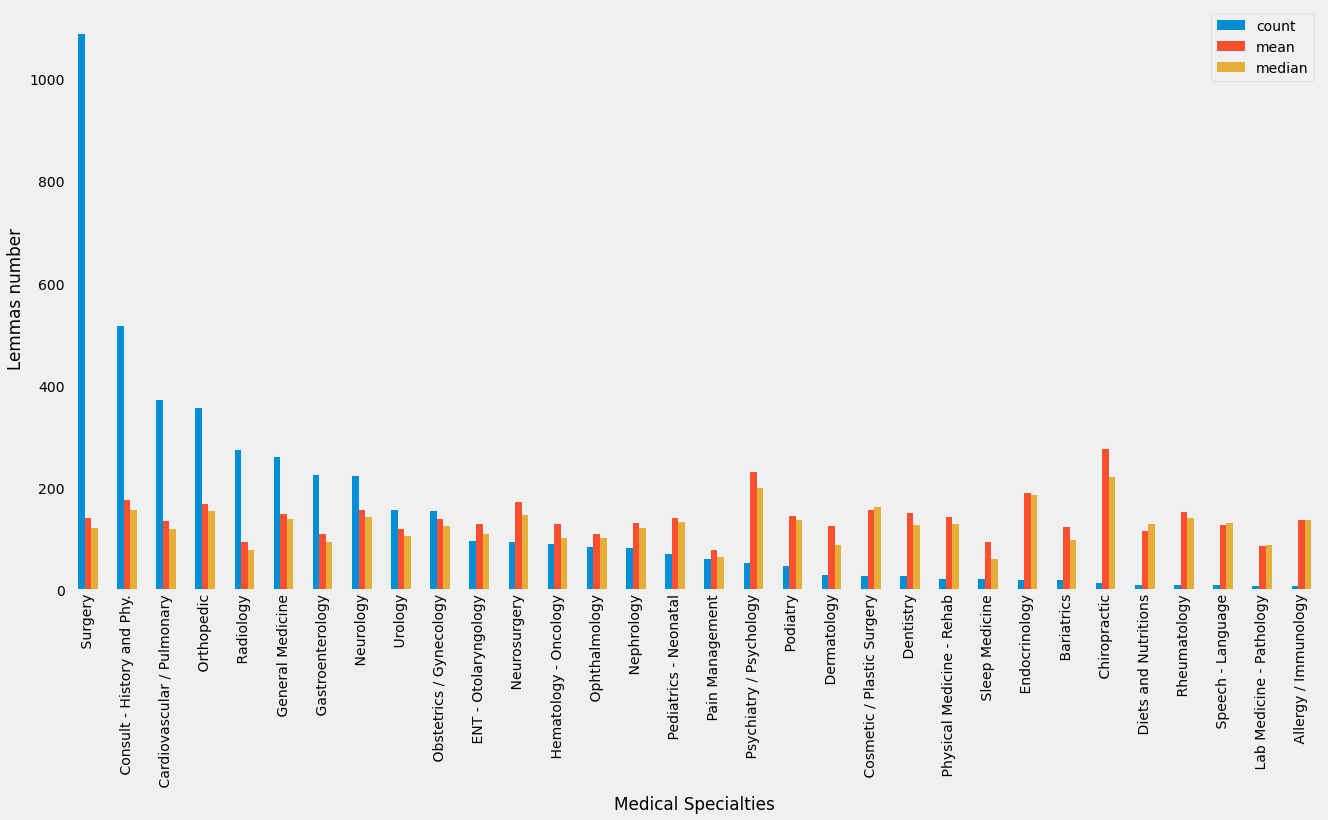

In [54]:
# A good snapshot: in our corpus there is a great number of texts for Surgery, but for practices like Psychiatry and 
#Immunology very few. Nonetheless, mean and median of tokes are high for those categories, which means that the corpora
#are long
data.groupby('medical_specialty')['lemmatize_count'].agg(['count', 'mean', 'median']).sort_values(by='count',ascending = False).plot(kind='bar', figsize=(20,10))
plt.ylabel("Lemmas number" )
plt.xlabel("Medical Specialties")
plt.grid()
plt.xticks(rotation = 90)
plt.legend(fancybox= True)

In [55]:
#Decided to group some categories in sleep and Pain, Dermatology and Cosmetic Surgery In SKIN cosmetics, Chiropratic and Phisical med Rehab, 
#Bariatrics and Nutritions in Dietology,                
# data = data.replace({' Sleep Medicine': 'Sleep and Pain', ' Pain Management': 'Sleep and Pain'})
# data
# # Combining similar offenses together
data = data.replace({' Sleep Medicine': " Sleep and Pain", ' Pain Management': " Sleep and Pain"})
data

,description,medical_specialty,transcription,tokenized_sents,POSTags,Nouns,lemmatize,lemmatize_count,tokens
0,A 23-year-old white female presents with comp...,Allergy / Immunology,subjective this -year-old white female pres...,"['subjective', 'this', '-year-old', 'white', '...","[(subjective, NN), (this, DT), (-year-old, JJ)...","[(subjective, NN), (female, NN), (presents, NN...","[subjective, female, present, complaint, aller...",49,209
1,Consult for laparoscopic gastric bypass.,Bariatrics,past medical history he has difficulty climbin...,"['past', 'medical', 'history', 'he', 'has', 'd...","[(past, JJ), (medical, JJ), (history, NN), (he...","[(history, NN), (difficulty, NN), (stairs, NNS...","[history, difficulty, stair, difficulty, airli...",129,348
2,Consult for laparoscopic gastric bypass.,Bariatrics,history of present illness i have seen abc tod...,"['history', 'of', 'present', 'illness', 'i', '...","[(history, NN), (of, IN), (present, JJ), (illn...","[(history, NN), (illness, NN), (i, NN), (abc, ...","[history, illness, i, abc, today, gentleman, y...",213,704
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,-d m-mode left atrial enlargement with left...,"['-d', 'm-mode', 'left', 'atrial', 'enlargemen...","[(-d, JJ), (m-mode, NN), (left, VBD), (atrial,...","[(m-mode, NN), (enlargement, NN), (diameter, N...","[m-mode, enlargement, diameter, cm, size, righ...",22,62
4,2-D Echocardiogram,Cardiovascular / Pulmonary,the left ventricular cavity size and wall thi...,"['the', 'left', 'ventricular', 'cavity', 'size...","[(the, DT), (left, NN), (ventricular, JJ), (ca...","[(left, NN), (cavity, NN), (size, NN), (wall, ...","[left, cavity, size, wall, thickness, wall, mo...",65,221
...,...,...,...,...,...,...,...,...,...
4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,history i had the pleasure of meeting and eva...,"['history', 'i', 'had', 'the', 'pleasure', 'of...","[(history, NN), (i, NN), (had, VBD), (the, DT)...","[(history, NN), (i, NN), (pleasure, NN), (meet...","[history, i, pleasure, meeting, patient, today...",245,792
4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,admitting diagnosis kawasaki disease discharg...,"['admitting', 'diagnosis', 'kawasaki', 'diseas...","[(admitting, VBG), (diagnosis, NN), (kawasaki,...","[(diagnosis, NN), (kawasaki, NN), (disease, NN...","[diagnosis, kawasaki, disease, discharge, diag...",79,262
4996,A female for a complete physical and follow u...,Allergy / Immunology,subjective this is a -year-old white female ...,"['subjective', 'this', 'is', 'a', '-year-old',...","[(subjective, NN), (this, DT), (is, VBZ), (a, ...","[(subjective, NN), (female, NN), (today, NN), ...","[subjective, female, today, physical, asthma, ...",185,716
4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,chief complaint this -year-old male presents ...,"['chief', 'complaint', 'this', '-year-old', 'm...","[(chief, JJ), (complaint, NN), (this, DT), (-y...","[(complaint, NN), (male, NN), (presents, NNS),...","[complaint, male, present, child, hospital, em...",136,396


In [56]:
# # Combining similar offenses together
#Group sleep and Pain, Dermatology and Cosmetic Surgery In SKIN cosmetics, Chiropratic and Phisical med Rehab, 
#Bariatrics and Nutritions in Dietology,                
# data = data.replace({' Sleep Medicine': 'Sleep and Pain', ' Pain Management': 'Sleep and Pain'})
# data
data = data.replace({' Cosmetic / Plastic Surgery': " SKIN cosmetics", ' Dermatology': " SKIN cosmetics"})
data['medical_specialty'].value_counts()

 Surgery                       1088
 Consult - History and Phy.     516
 Cardiovascular / Pulmonary     371
 Orthopedic                     355
 Radiology                      273
 General Medicine               259
 Gastroenterology               224
 Neurology                      223
 Urology                        156
 Obstetrics / Gynecology        155
 ENT - Otolaryngology            96
 Neurosurgery                    94
 Hematology - Oncology           90
 Ophthalmology                   83
 Sleep and Pain                  81
 Nephrology                      81
 Pediatrics - Neonatal           70
 SKIN cosmetics                  56
 Psychiatry / Psychology         53
 Podiatry                        47
 Dentistry                       27
 Physical Medicine - Rehab       21
 Endocrinology                   19
 Bariatrics                      18
 Chiropractic                    14
 Diets and Nutritions            10
 Rheumatology                    10
 Speech - Language          

In [57]:
data = data.replace({' Chiropractic': " Physical Therapy", ' Physical Medicine - Rehab': " Physical Therapy"})
data['medical_specialty'].value_counts()

 Surgery                       1088
 Consult - History and Phy.     516
 Cardiovascular / Pulmonary     371
 Orthopedic                     355
 Radiology                      273
 General Medicine               259
 Gastroenterology               224
 Neurology                      223
 Urology                        156
 Obstetrics / Gynecology        155
 ENT - Otolaryngology            96
 Neurosurgery                    94
 Hematology - Oncology           90
 Ophthalmology                   83
 Sleep and Pain                  81
 Nephrology                      81
 Pediatrics - Neonatal           70
 SKIN cosmetics                  56
 Psychiatry / Psychology         53
 Podiatry                        47
 Physical Therapy                35
 Dentistry                       27
 Endocrinology                   19
 Bariatrics                      18
 Diets and Nutritions            10
 Rheumatology                    10
 Speech - Language                9
 Lab Medicine - Pathology   

In [58]:
data = data.replace({' Bariatrics': " Dietetics", ' Diets and Nutritions': " Dietetics"})
data['medical_specialty'].value_counts()

 Surgery                       1088
 Consult - History and Phy.     516
 Cardiovascular / Pulmonary     371
 Orthopedic                     355
 Radiology                      273
 General Medicine               259
 Gastroenterology               224
 Neurology                      223
 Urology                        156
 Obstetrics / Gynecology        155
 ENT - Otolaryngology            96
 Neurosurgery                    94
 Hematology - Oncology           90
 Ophthalmology                   83
 Sleep and Pain                  81
 Nephrology                      81
 Pediatrics - Neonatal           70
 SKIN cosmetics                  56
 Psychiatry / Psychology         53
 Podiatry                        47
 Physical Therapy                35
 Dietetics                       28
 Dentistry                       27
 Endocrinology                   19
 Rheumatology                    10
 Speech - Language                9
 Lab Medicine - Pathology         8
 Allergy / Immunology       

In [59]:
data = data.replace({' Neurology': " Neurologists", ' Neurosurgery': " Neurologists"})
data['medical_specialty'].value_counts()

 Surgery                       1088
 Consult - History and Phy.     516
 Cardiovascular / Pulmonary     371
 Orthopedic                     355
 Neurologists                   317
 Radiology                      273
 General Medicine               259
 Gastroenterology               224
 Urology                        156
 Obstetrics / Gynecology        155
 ENT - Otolaryngology            96
 Hematology - Oncology           90
 Ophthalmology                   83
 Nephrology                      81
 Sleep and Pain                  81
 Pediatrics - Neonatal           70
 SKIN cosmetics                  56
 Psychiatry / Psychology         53
 Podiatry                        47
 Physical Therapy                35
 Dietetics                       28
 Dentistry                       27
 Endocrinology                   19
 Rheumatology                    10
 Speech - Language                9
 Lab Medicine - Pathology         8
 Allergy / Immunology             7
Name: medical_specialty, dty

In [60]:
# Final count of medical specialties (for now)
data = data.replace({' Lab Medicine - Pathology': " Pathology"})
data['medical_specialty'].nunique()

27

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4514 entries, 0 to 4998
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        4514 non-null   object
 1   medical_specialty  4514 non-null   object
 2   transcription      4514 non-null   object
 3   tokenized_sents    4514 non-null   object
 4   POSTags            4514 non-null   object
 5   Nouns              4514 non-null   object
 6   lemmatize          4514 non-null   object
 7   lemmatize_count    4514 non-null   int64 
 8   tokens             4514 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 512.7+ KB


In [62]:
#Setting a cutoff lowerbound (250 tokens) and upperbound (1000) for the number of Lemma
data = data[(data['lemmatize_count'] >= 60) & (data['lemmatize_count'] <= 250)]
print(data['lemmatize_count'].min())
print(data['lemmatize_count'].max())

60
250


In [63]:
data['medical_specialty'].nunique()

27

In [64]:
data['medical_specialty'].value_counts()

 Surgery                       818
 Consult - History and Phy.    396
 Cardiovascular / Pulmonary    259
 Orthopedic                    253
 Neurologists                  229
 General Medicine              203
 Gastroenterology              164
 Radiology                     160
 Obstetrics / Gynecology       119
 Urology                       109
 ENT - Otolaryngology           72
 Hematology - Oncology          68
 Ophthalmology                  63
 Nephrology                     61
 Pediatrics - Neonatal          57
 SKIN cosmetics                 44
 Sleep and Pain                 41
 Psychiatry / Psychology        27
 Dentistry                      25
 Podiatry                       25
 Dietetics                      23
 Physical Therapy               21
 Endocrinology                  14
 Rheumatology                    8
 Speech - Language               7
 Pathology                       6
 Allergy / Immunology            5
Name: medical_specialty, dtype: int64

In [65]:
print(data['tokens'].min())
print(data['tokens'].max())

102
969


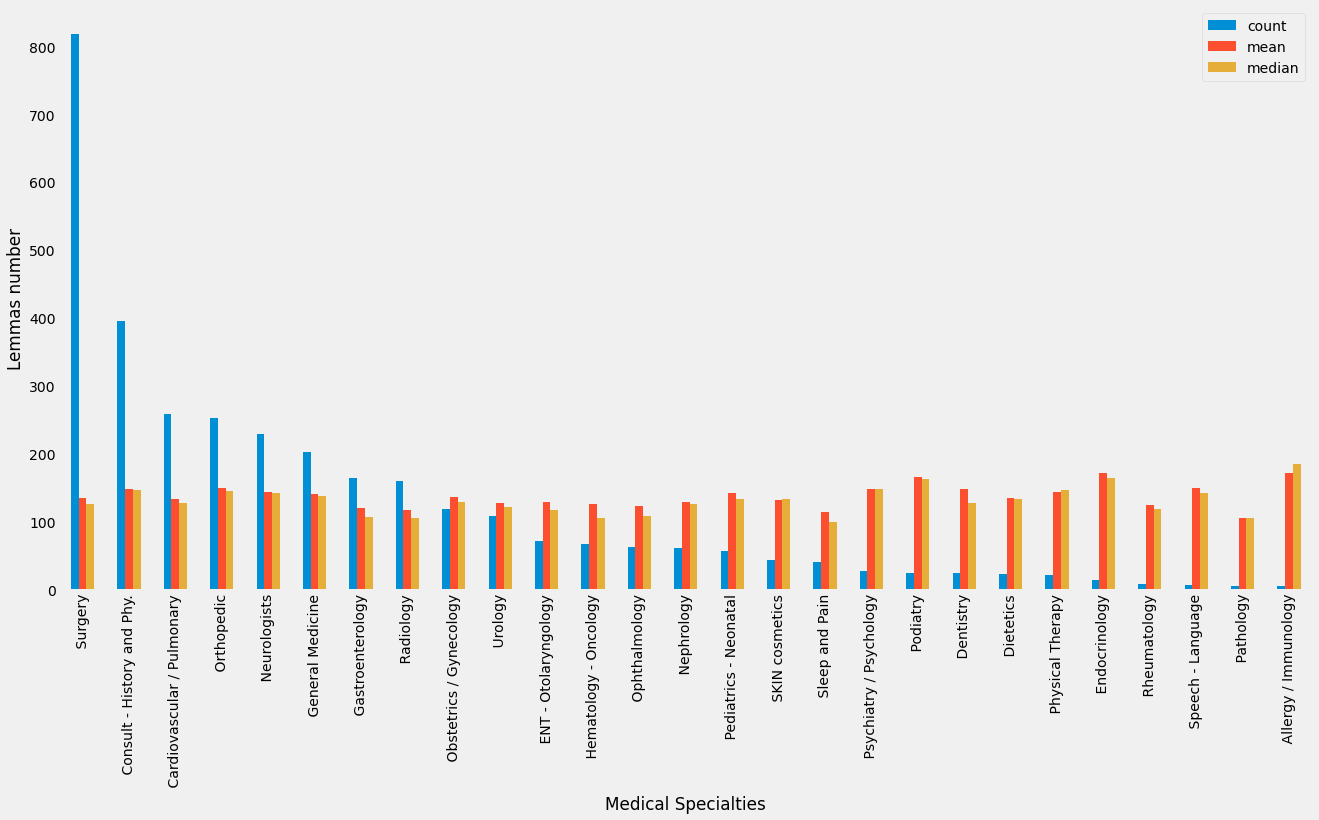

In [66]:
# Cleaned snapshot
data.groupby('medical_specialty')['lemmatize_count'].agg(['count', 'mean', 'median']).sort_values(by='count',ascending = False).plot(kind='bar', figsize=(20,10))
plt.ylabel("Lemmas number" )
plt.xlabel("Medical Specialties")
plt.grid()
plt.xticks(rotation = 90)
plt.legend(fancybox= True)
plt.savefig('Corpus_view_with_Lemmas')

In [67]:
data.groupby('medical_specialty')['lemmatize_count'].agg(['count', 'mean', 'median']).sort_values(by='count',ascending = False)


,count,mean,median
medical_specialty,,,
Surgery,818,135.386308,126.0
Consult - History and Phy.,396,148.037879,147.0
Cardiovascular / Pulmonary,259,133.853282,128.0
Orthopedic,253,149.221344,146.0
Neurologists,229,144.537118,142.0
General Medicine,203,141.103448,138.0
Gastroenterology,164,119.567073,107.0
Radiology,160,117.881250,105.0
Obstetrics / Gynecology,119,136.798319,129.0


In [68]:
data.sample(5)

,description,medical_specialty,transcription,tokenized_sents,POSTags,Nouns,lemmatize,lemmatize_count,tokens
1734,Cardiolite treadmill exercise stress test. T...,Radiology,cardiolite treadmill exercise stress test clin...,"['cardiolite', 'treadmill', 'exercise', 'stres...","[(cardiolite, NN), (treadmill, NN), (exercise,...","[(cardiolite, NN), (treadmill, NN), (exercise,...","[cardiolite, treadmill, exercise, stress, test...",67,193
4321,Local reaction secondary to insect sting. Pa...,Consult - History and Phy.,history of present illness patient is a -ye...,"['history', 'of', 'present', 'illness', 'patie...","[(history, NN), (of, IN), (present, JJ), (illn...","[(history, NN), (patient, NN), (male, NN), (wi...","[history, patient, male, wife, bee, hand, hand...",117,473
2400,"Cataract, right eye. Phacoemulsification wit...",Ophthalmology,preoperative diagnosis cataract right eye po...,"['preoperative', 'diagnosis', 'cataract', 'rig...","[(preoperative, JJ), (diagnosis, NN), (catarac...","[(diagnosis, NN), (cataract, NN), (eye, NN), (...","[diagnosis, cataract, eye, diagnosis, cataract...",90,298
4056,Nipple areolar reconstruction utilizing a ful...,SKIN cosmetics,preoperative diagnoses surgical absence of le...,"['preoperative', 'diagnoses', 'surgical', 'abs...","[(preoperative, JJ), (diagnoses, NNS), (surgic...","[(diagnoses, NNS), (absence, NN), (areola, NN)...","[diagnosis, absence, areola, history, breast, ...",179,610
2217,Hardware removal in the left elbow.,Orthopedic,preoperative diagnosis retained hardware in le...,"['preoperative', 'diagnosis', 'retained', 'har...","[(preoperative, JJ), (diagnosis, NN), (retaine...","[(diagnosis, NN), (hardware, NN), (elbow, NN),...","[diagnosis, hardware, elbow, diagnosis, hardwa...",121,365


In [69]:
# data['lemmatize'].astype('str')

# data_test = data


In [70]:
# data = data_test


In [71]:
data_all_surgery = data[data['medical_specialty'] == ' Surgery']

In [72]:
data_all_surgery 

,description,medical_specialty,transcription,tokenized_sents,POSTags,Nouns,lemmatize,lemmatize_count,tokens
181,Wound debridement with removal of Surgisis xe...,Surgery,preoperative diagnoses open wound from right ...,"['preoperative', 'diagnoses', 'open', 'wound',...","[(preoperative, JJ), (diagnoses, NNS), (open, ...","[(diagnoses, NNS), (axilla, NN), (abdomen, NNS...","[diagnosis, axilla, abdomen, vascular, graft, ...",88,345
182,Visually significant posterior capsule opacit...,Surgery,preoperative diagnosis visually significant p...,"['preoperative', 'diagnosis', 'visually', 'sig...","[(preoperative, JJ), (diagnosis, NN), (visuall...","[(diagnosis, NN), (capsule, NN), (opacity, NN)...","[diagnosis, capsule, opacity, eye, diagnosis, ...",66,207
185,Placement of right new ventriculoperitoneal (...,Surgery,title of operation placement of right new vent...,"['title', 'of', 'operation', 'placement', 'of'...","[(title, NN), (of, IN), (operation, NN), (plac...","[(title, NN), (operation, NN), (placement, NN)...","[title, operation, placement, ventriculoperito...",75,268
190,Unilateral transpedicular T11 vertebroplasty.,Surgery,preoperative diagnosis tcompression fracture ...,"['preoperative', 'diagnosis', 'tcompression', ...","[(preoperative, JJ), (diagnosis, NN), (tcompre...","[(diagnosis, NN), (tcompression, NN), (fractur...","[diagnosis, tcompression, fracture, pain, diag...",106,357
191,Insertion of a VVIR permanent pacemaker. Thi...,Surgery,procedure performed insertion of a vvir perma...,"['procedure', 'performed', 'insertion', 'of', ...","[(procedure, NN), (performed, VBD), (insertion...","[(procedure, NN), (insertion, NN), (pacemaker,...","[procedure, insertion, pacemaker, complication...",189,602
...,...,...,...,...,...,...,...,...,...
1276,Removal of the hardware and revision of right...,Surgery,preoperative diagnosis right ac separation p...,"['preoperative', 'diagnosis', 'right', 'ac', '...","[(preoperative, JJ), (diagnosis, NN), (right, ...","[(diagnosis, NN), (separation, NN), (diagnosis...","[diagnosis, separation, diagnosis, separation,...",61,210
1277,"Excision of abscess, removal of foreign body....",Surgery,preoperative diagnosis recurrent re-infected s...,"['preoperative', 'diagnosis', 'recurrent', 're...","[(preoperative, JJ), (diagnosis, NN), (recurre...","[(diagnosis, NN), (recurrent, NN), (cyst, NN),...","[diagnosis, recurrent, cyst, abdomen, diagnosi...",91,344
1278,Congenital chylous ascites and chylothorax an...,Surgery,preoperative diagnoses congenital chylous ...,"['preoperative', 'diagnoses', 'congenital', 'c...","[(preoperative, JJ), (diagnoses, NNS), (congen...","[(diagnoses, NNS), (ascites, NNS), (chylothora...","[diagnosis, ascites, chylothorax, rule, leak, ...",214,823
1279,Incision and drainage (I&D) of abdominal absc...,Surgery,preoperative diagnosis abdominal wall abscess ...,"['preoperative', 'diagnosis', 'abdominal', 'wa...","[(preoperative, JJ), (diagnosis, NN), (abdomin...","[(diagnosis, NN), (wall, NN), (abscess, NN), (...","[diagnosis, wall, abscess, diagnosis, wall, pr...",91,313


In [73]:
data_no_surgery = data[data['medical_specialty'] != ' Surgery']

In [74]:
random_data_surgery = data_all_surgery.sample(n=250)

In [75]:
data = pd.concat([data_no_surgery, random_data_surgery])

In [76]:
data_all_consultancy = data[data['medical_specialty'] == ' Consult - History and Phy.']

In [77]:
data_no_consultancy = data[data['medical_specialty'] != ' Consult - History and Phy.']

In [78]:
random_data_consultancy = data_all_consultancy.sample(n=250)

In [79]:
data = pd.concat([data_no_consultancy, random_data_consultancy])

In [80]:
data['medical_specialty'].value_counts()

 Cardiovascular / Pulmonary    259
 Orthopedic                    253
 Surgery                       250
 Consult - History and Phy.    250
 Neurologists                  229
 General Medicine              203
 Gastroenterology              164
 Radiology                     160
 Obstetrics / Gynecology       119
 Urology                       109
 ENT - Otolaryngology           72
 Hematology - Oncology          68
 Ophthalmology                  63
 Nephrology                     61
 Pediatrics - Neonatal          57
 SKIN cosmetics                 44
 Sleep and Pain                 41
 Psychiatry / Psychology        27
 Podiatry                       25
 Dentistry                      25
 Dietetics                      23
 Physical Therapy               21
 Endocrinology                  14
 Rheumatology                    8
 Speech - Language               7
 Pathology                       6
 Allergy / Immunology            5
Name: medical_specialty, dtype: int64

In [81]:
data = data.replace({' Pediatrics - Neonatal': " Others", " SKIN cosmetics": ' Others',' Sleep and Pain': ' Others',
                     ' Psychiatry / Psychology':' Others', ' Dentistry': ' Others', ' Podiatry':' Others'})
data['medical_specialty'].value_counts()

 Cardiovascular / Pulmonary    259
 Orthopedic                    253
 Consult - History and Phy.    250
 Surgery                       250
 Neurologists                  229
 Others                        219
 General Medicine              203
 Gastroenterology              164
 Radiology                     160
 Obstetrics / Gynecology       119
 Urology                       109
 ENT - Otolaryngology           72
 Hematology - Oncology          68
 Ophthalmology                  63
 Nephrology                     61
 Dietetics                      23
 Physical Therapy               21
 Endocrinology                  14
 Rheumatology                    8
 Speech - Language               7
 Pathology                       6
 Allergy / Immunology            5
Name: medical_specialty, dtype: int64

In [82]:
data = data.replace({' Dietetics': " Others", " Physical Therapy": ' Others',' Endocrinology': ' Others',
                     ' Rheumatology':' Others', ' Speech - Language': ' Others', ' Pathology':' Others', ' Allergy / Immunology': ' Others' })
data['medical_specialty'].value_counts()

 Others                        303
 Cardiovascular / Pulmonary    259
 Orthopedic                    253
 Surgery                       250
 Consult - History and Phy.    250
 Neurologists                  229
 General Medicine              203
 Gastroenterology              164
 Radiology                     160
 Obstetrics / Gynecology       119
 Urology                       109
 ENT - Otolaryngology           72
 Hematology - Oncology          68
 Ophthalmology                  63
 Nephrology                     61
Name: medical_specialty, dtype: int64

In [83]:
# data['lemmatize_to_string']= data['lemmatize'].astype('str')
data['lemmatize_to_string']= data['lemmatize'].str.join(" ")
type(data['lemmatize_to_string'])

pandas.core.series.Series

# Creating the Model

In [84]:
#Creating the label and Creating the Training and Test Datasets
#first thing to do is to separate out the label from the numerical dataframe
X = data.drop("medical_specialty", axis=1)
y = data["medical_specialty"]
#Imput is the X dataset. 
print(X.shape, y.shape)

(2563, 9) (2563,)


In [85]:
X

,description,transcription,tokenized_sents,POSTags,Nouns,lemmatize,lemmatize_count,tokens,lemmatize_to_string
1,Consult for laparoscopic gastric bypass.,past medical history he has difficulty climbin...,"['past', 'medical', 'history', 'he', 'has', 'd...","[(past, JJ), (medical, JJ), (history, NN), (he...","[(history, NN), (difficulty, NN), (stairs, NNS...","[history, difficulty, stair, difficulty, airli...",129,348,history difficulty stair difficulty airline se...
2,Consult for laparoscopic gastric bypass.,history of present illness i have seen abc tod...,"['history', 'of', 'present', 'illness', 'i', '...","[(history, NN), (of, IN), (present, JJ), (illn...","[(history, NN), (illness, NN), (i, NN), (abc, ...","[history, illness, i, abc, today, gentleman, y...",213,704,history illness i abc today gentleman year pou...
4,2-D Echocardiogram,the left ventricular cavity size and wall thi...,"['the', 'left', 'ventricular', 'cavity', 'size...","[(the, DT), (left, NN), (ventricular, JJ), (ca...","[(left, NN), (cavity, NN), (size, NN), (wall, ...","[left, cavity, size, wall, thickness, wall, mo...",65,221,left cavity size wall thickness wall motion fu...
5,Morbid obesity. Laparoscopic antecolic anteg...,preoperative diagnosis morbid obesity postope...,"['preoperative', 'diagnosis', 'morbid', 'obesi...","[(preoperative, JJ), (diagnosis, NN), (morbid,...","[(diagnosis, NN), (morbid, NN), (obesity, NN),...","[diagnosis, morbid, obesity, diagnosis, morbid...",231,719,diagnosis morbid obesity diagnosis morbid obes...
6,"Liposuction of the supraumbilical abdomen, re...",preoperative diagnoses deformity right breast...,"['preoperative', 'diagnoses', 'deformity', 'ri...","[(preoperative, JJ), (diagnoses, NNS), (deform...","[(diagnoses, NNS), (deformity, NN), (breast, N...","[diagnosis, deformity, breast, reconstruction,...",175,599,diagnosis deformity breast reconstruction tiss...
...,...,...,...,...,...,...,...,...,...
4318,"Chief complaint of chest pain, previously dia...",history patient is a -year-old white woman w...,"['history', 'patient', 'is', 'a', '-year-old',...","[(history, NN), (patient, NN), (is, VBZ), (a, ...","[(history, NN), (patient, NN), (woman, NN), (c...","[history, patient, woman, complaint, chest, pa...",164,476,history patient woman complaint chest pain hyp...
4502,"A 37-year-old admitted through emergency, pre...",reason for consultation chest pain history o...,"['reason', 'for', 'consultation', 'chest', 'pa...","[(reason, NN), (for, IN), (consultation, NN), ...","[(reason, NN), (consultation, NN), (chest, NN)...","[reason, consultation, chest, pain, history, i...",150,397,reason consultation chest pain history illness...
4359,The patient is a 61-year-old lady who was fou...,history of present illness goes back to yester...,"['history', 'of', 'present', 'illness', 'goes'...","[(history, NN), (of, IN), (present, JJ), (illn...","[(history, NN), (illness, NN), (yesterday, NN)...","[history, illness, yesterday, patient, dinner,...",180,532,history illness yesterday patient dinner boyfr...
4494,Marked right hydronephrosis without hydruria.,chief complaint right hydronephrosis history...,"['chief', 'complaint', 'right', 'hydronephrosi...","[(chief, JJ), (complaint, NN), (right, JJ), (h...","[(complaint, NN), (hydronephrosis, NN), (histo...","[complaint, hydronephrosis, history, illness, ...",97,346,complaint hydronephrosis history illness patie...


In [86]:
y.nunique()

15

In [87]:
y.unique()

array([' Others', ' Cardiovascular / Pulmonary', ' Neurologists',
       ' Urology', ' General Medicine', ' Radiology', ' Orthopedic',
       ' Ophthalmology', ' Obstetrics / Gynecology', ' Nephrology',
       ' Hematology - Oncology', ' Gastroenterology',
       ' ENT - Otolaryngology', ' Surgery', ' Consult - History and Phy.'],
      dtype=object)

In [88]:
# Import the necessaried dependecies 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

In [89]:
#We imports the module for creating training and test data sets.
from sklearn.model_selection import train_test_split

#The third line creates the training (X_train, y_train) and test set (X-test, y_test) arrays,  The 'random_state' argument ensures that the results are reproducible.
X_train, X_test, y_train, y_test = train_test_split(data['lemmatize_to_string'], y, test_size=0.30, random_state=100)

#The fourth line prints the shape of the overall, training and test dataset, respectively.
print(data.shape); print(X_train.shape); print(X_test.shape)

(2563, 10)
(1794,)
(769,)


In [90]:
X_train

1781    data psychosis history illness patient samoan ...
1603    cc onset blindness hx y/o rhf state / / tongue...
4975    history illness mr abc gentleman stress test t...
2080    diagnosis ankle sprain history patient female ...
2385    diagnosis globe prolapse ox diagnosis globe pr...
                              ...                        
1844    complaint foot history illness school athlete ...
4806    indication pain interpretation heart rate bloo...
112     diagnosis hypospadias diagnosis hypospadias pr...
4711    reason consult effusion history illness patien...
3565    complaint stomach pain week history illness pa...
Name: lemmatize_to_string, Length: 1794, dtype: object

In [91]:
X_test

1220    diagnosis acute appendicitis diagnosis acute a...
4345    complaint baby fever hour history illness infa...
4287    reason visit patient evaluation mr meningioma ...
521     diagnosisleft breast mass mammogram diagnosis ...
1734    cardiolite treadmill exercise stress test data...
                              ...                        
3051    diagnosis disease vein occlusion status post t...
1037    procedure system cineangiography system cinean...
592     diagnosis pregnancy week testing induction dia...
3310    patient headache spell rash right calf dizzine...
339     diagnosis mass skin lesion diagnosis mass skin...
Name: lemmatize_to_string, Length: 769, dtype: object

In [92]:
y_train

1781                         Others
1603                      Radiology
4975     Cardiovascular / Pulmonary
2080                     Orthopedic
2385                  Ophthalmology
                   ...             
1844                         Others
4806     Cardiovascular / Pulmonary
112                         Urology
4711     Cardiovascular / Pulmonary
3565               Gastroenterology
Name: medical_specialty, Length: 1794, dtype: object

In [93]:
y_test

1220                        Surgery
4345     Consult - History and Phy.
4287     Consult - History and Phy.
521                         Surgery
1734                      Radiology
                   ...             
3051                     Nephrology
1037                        Surgery
592                         Surgery
3310               General Medicine
339                         Surgery
Name: medical_specialty, Length: 769, dtype: object

# Converting Text to Word Frequency Vectors with TfidfVectorizer.

We have processed the text, but we need to convert it to word frequency vectors for building machine learning models. There are several ways to do this, such as using CountVectorizer and HashingVectorizer, but the TfidfVectorizer is the most popular one.

In [94]:
# TF-IDF is an acronym that stands for 'Term Frequency-Inverse Document Frequency'. 
#It is used as a weighting factor in text mining applications.

# Term Frequency (TF): This summarizes the normalized Term Frequency within a document.

# Inverse Document Frequency (IDF): This reduces the weight of terms that appear a lot across documents. 

#In simple terms, TF-IDF attempts to highlight important words which are frequent in a document but not across documents. 
#We will work on creating TF-IDF vectors for our documents.

In [95]:
# The first line of code below imports the TfidfVectorizer from 'sklearn.feature_extraction.text' module
from sklearn.feature_extraction.text import TfidfVectorizer

# The second line initializes the TfidfVectorizer object, called 'vectorizer_tfidf
vectorizer_tfidf = TfidfVectorizer()

# The third line fits and transforms the training data.
train_tfIdf = vectorizer_tfidf.fit_transform(X_train.values.astype('U'))

# The fourth line of code transforms the test data, while the fifth line prints the first 10 features.
test_tfIdf = vectorizer_tfidf.transform(X_test.values.astype('U'))

print(vectorizer_tfidf.get_feature_names()[:10])

['__', '___', '____', '_____', '______', '_______', 'aand', 'abbott', 'abc', 'abcd']


In [96]:
print(train_tfIdf)

  (0, 4426)	0.07590433166141698
  (0, 8353)	0.05945259583830843
  (0, 5924)	0.03535843873230009
  (0, 2618)	0.08780232667920221
  (0, 1671)	0.050597321550177245
  (0, 8819)	0.11254114084907248
  (0, 4085)	0.09170413030624837
  (0, 4083)	0.08316182810539358
  (0, 667)	0.09892144194418001
  (0, 8245)	0.09738180794859005
  (0, 4259)	0.10450303136748233
  (0, 6872)	0.06231476315933171
  (0, 4701)	0.20900606273496466
  (0, 1278)	0.07456893707538856
  (0, 9085)	0.09528920385046431
  (0, 8800)	0.08870323272265097
  (0, 8526)	0.13122026174164783
  (0, 3527)	0.09738180794859005
  (0, 924)	0.09892144194418001
  (0, 4587)	0.18248483514250563
  (0, 8478)	0.1031197602172632
  (0, 2949)	0.13178839794535913
  (0, 3734)	0.057393841265867176
  (0, 440)	0.07215704702051476
  (0, 2152)	0.0698570074218224
  :	:
  (1793, 5169)	0.0788468720286062
  (1793, 5377)	0.05017283719337952
  (1793, 2937)	0.039585826061174584
  (1793, 7238)	0.07267250989288125
  (1793, 971)	0.06317878566190263
  (1793, 8812)	0.045590

In [97]:
# [np.array(X_train[i]) for i in X_train.index]

In [98]:
# # The first line of code below imports the TfidfVectorizer from 'sklearn.feature_extraction.text' module
# from sklearn.feature_extraction.text import TfidfVectorizer

# # The second line initializes the TfidfVectorizer object, called 'vectorizer_tfidf
# vectorizer_tfidf = TfidfVectorizer()

# # The third line fits and transforms the training data.
# train_tfIdf = vectorizer_tfidf.fit_transform([np.array(X_train[i]) for i in X_train.index])

# # The fourth line of code transforms the test data, while the fifth line prints the first 10 features.
# test_tfIdf = vectorizer_tfidf.transform([np.array(X_test[i]) for i in X_test.index])

# print(vectorizer_tfidf.get_feature_names()[:10])

In [99]:
# Let's look at the shape of the transformed TF-IDF train and test datasets. 
# The following line of code performs this task.
print(train_tfIdf.shape); print(test_tfIdf.shape)

(1794, 9291)
(769, 9291)


In [100]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# The fourth line of code fits the classifier on the training data
nb_classifier.fit(train_tfIdf, y_train)

# our model is trained and it is ready to generate predictions on the unseen data. 
# This is performed in the fifth line of code, while the sixth line prints the predicted class for the first 10 records in the test data.
pred2 = nb_classifier.predict(test_tfIdf) 
print(pred2[:10])

[' Gastroenterology' ' Consult - History and Phy.' ' Neurologists'
 ' Surgery' ' Cardiovascular / Pulmonary' ' Orthopedic' ' Neurologists'
 ' Orthopedic' ' Surgery' ' Cardiovascular / Pulmonary']


In [101]:
print(f"Predicted classes: {pred2[:10]}")
print(f"Actual Labels: {list(y_test[:10])}")

Predicted classes: [' Gastroenterology' ' Consult - History and Phy.' ' Neurologists'
 ' Surgery' ' Cardiovascular / Pulmonary' ' Orthopedic' ' Neurologists'
 ' Orthopedic' ' Surgery' ' Cardiovascular / Pulmonary']
Actual Labels: [' Surgery', ' Consult - History and Phy.', ' Consult - History and Phy.', ' Surgery', ' Radiology', ' Others', ' Neurologists', ' Surgery', ' Others', ' Cardiovascular / Pulmonary']


In [102]:
pd.DataFrame({"Prediction": pred2[:20], "Actual": y_test[:20]}).reset_index(drop=True)

,Prediction,Actual
0,Gastroenterology,Surgery
1,Consult - History and Phy.,Consult - History and Phy.
2,Neurologists,Consult - History and Phy.
3,Surgery,Surgery
4,Cardiovascular / Pulmonary,Radiology
5,Orthopedic,Others
6,Neurologists,Neurologists
7,Orthopedic,Surgery
8,Surgery,Others
9,Cardiovascular / Pulmonary,Cardiovascular / Pulmonary


In [103]:
# Calculate the accuracy score: score
accuracy_tfidf = metrics.accuracy_score(y_test, pred2)
print(accuracy_tfidf)

Conf_metrics_tfidf = metrics.confusion_matrix(y_test, pred2)
print(Conf_metrics_tfidf)

0.34850455136540964
[[41 18  0  0  0  0  0  0  0  0  0  1  0  7  0]
 [ 1 52  0  0  0  0  0  5  0  0  4 10  0  0  0]
 [ 1  7  0  0  0  0  0  0  0  0  0  4  0 12  0]
 [ 1 11  0 20  0  0  0  0  0  0  0  3  2  9  0]
 [ 2 64  0  0  1  0  0  0  0  0  0  4  0  0  0]
 [ 0 12  0  0  0  0  0  0  0  0  0  0  1  5  0]
 [ 3  9  0  0  0  0  0  0  0  0  0  1  1  5  0]
 [ 3 10  0  0  0  0  0 26  0  0 10  9  1 10  0]
 [ 0  8  0  1  0  0  0  0  7  0  0  3  0 13  0]
 [ 0  3  0  0  0  0  0  0  0  3  0  1  0 12  0]
 [ 0  6  0  0  0  0  0  3  0  0 60  9  0  1  0]
 [ 4 36  0  0  0  0  0  4  0  0 14 33  0 12  0]
 [ 9  1  0  5  0  0  0 17  1  0 10  3  0  0  0]
 [14  1  0  7  0  0  0  2  3  1 15  3  0 24  0]
 [ 0 13  0  0  0  0  0  0  0  0  0  1  0 19  1]]


In [107]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred2)

array([[41, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  7,  0],
       [ 1, 52,  0,  0,  0,  0,  0,  5,  0,  0,  4, 10,  0,  0,  0],
       [ 1,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  0, 12,  0],
       [ 1, 11,  0, 20,  0,  0,  0,  0,  0,  0,  0,  3,  2,  9,  0],
       [ 2, 64,  0,  0,  1,  0,  0,  0,  0,  0,  0,  4,  0,  0,  0],
       [ 0, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  5,  0],
       [ 3,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  5,  0],
       [ 3, 10,  0,  0,  0,  0,  0, 26,  0,  0, 10,  9,  1, 10,  0],
       [ 0,  8,  0,  1,  0,  0,  0,  0,  7,  0,  0,  3,  0, 13,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0,  0,  3,  0,  1,  0, 12,  0],
       [ 0,  6,  0,  0,  0,  0,  0,  3,  0,  0, 60,  9,  0,  1,  0],
       [ 4, 36,  0,  0,  0,  0,  0,  4,  0,  0, 14, 33,  0, 12,  0],
       [ 9,  1,  0,  5,  0,  0,  0, 17,  1,  0, 10,  3,  0,  0,  0],
       [14,  1,  0,  7,  0,  0,  0,  2,  3,  1, 15,  3,  0, 24,  0],
       [ 0, 13,  0,  0,  0,  0,  0

In [108]:
labels= [' Others', ' Cardiovascular / Pulmonary', ' Neurologists',
       ' Urology', ' General Medicine', ' Radiology', ' Orthopedic',
       ' Ophthalmology', ' Obstetrics / Gynecology', ' Nephrology',
       ' Hematology - Oncology', ' Gastroenterology',
       ' ENT - Otolaryngology', ' Surgery', ' Consult - History and Phy.']

In [109]:
print(818/3277) #Baseline accuracy: It is calculated as the number of times the majority class (i.e., 'Surgery') appears in the target variable, divided by the total number of observations.

0.24961855355508086


In [110]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,pred2,
                            target_names=labels))

                             precision    recall  f1-score   support

                     Others       0.52      0.61      0.56        67
 Cardiovascular / Pulmonary       0.21      0.72      0.32        72
               Neurologists       0.00      0.00      0.00        24
                    Urology       0.61      0.43      0.51        46
           General Medicine       1.00      0.01      0.03        71
                  Radiology       0.00      0.00      0.00        18
                 Orthopedic       0.00      0.00      0.00        19
              Ophthalmology       0.46      0.38      0.41        69
    Obstetrics / Gynecology       0.64      0.22      0.33        32
                 Nephrology       0.75      0.16      0.26        19
      Hematology - Oncology       0.53      0.76      0.63        79
           Gastroenterology       0.39      0.32      0.35       103
       ENT - Otolaryngology       0.00      0.00      0.00        46
                    Surgery      

In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 100)

rf=classifier.fit(train_tfIdf, y_train)
rf.score(test_tfIdf, y_test)

0.28218465539661897

In [112]:
predRF = classifier.predict(test_tfIdf) 
print(predRF[:10])

# Calculate the accuracy score
accuracy_RF = metrics.accuracy_score(y_test, predRF)
print(accuracy_RF)

Conf_metrics_RF = metrics.confusion_matrix(y_test, predRF)
print(Conf_metrics_RF)

[' Gastroenterology' ' Others' ' Neurologists' ' Surgery'
 ' Cardiovascular / Pulmonary' ' Orthopedic' ' Others' ' Orthopedic'
 ' Surgery' ' Cardiovascular / Pulmonary']
0.28218465539661897
[[27  9  2  0  6  0  0  1  0  0  0  3 10  9  0]
 [ 3 12  0  5 23  1  1  8  1  0  4 13  0  0  1]
 [ 0  3  5  0  0  0  0  0  0  0  1  5  2  8  0]
 [ 2  6  0 12  4  0  4  0  0  0  0  4  2 12  0]
 [ 6 30  0  2 21  0  0  0  0  0  1 10  1  0  0]
 [ 0  7  1  0  3  1  0  0  1  0  1  1  1  2  0]
 [ 2  5  0  2  3  0  1  0  0  0  0  0  1  2  3]
 [ 2  9  0  0  1  1  0 18  0  0 11  5 12 10  0]
 [ 0  4  0  0  0  1  0  0 17  0  0  1  4  5  0]
 [ 0  1  0  0  0  0  0  0  0 10  0  1  0  7  0]
 [ 0  6  0  0  0  1  0 12  0  0 37  7  6 10  0]
 [ 7 22  2  1  2  0  0  3  0  1 13 39  5  8  0]
 [ 8  0  0  2  0  0  3 13  3  0  8  5  4  0  0]
 [14  0  4 12  0  1  1  1  6  5 15  2  0  4  5]
 [ 3  7  0  0  1  0  1  0  0  0  0  5  0  8  9]]


In [113]:
labels= [' Others', ' Cardiovascular / Pulmonary', ' Neurologists',
       ' Urology', ' General Medicine', ' Radiology', ' Orthopedic',
       ' Ophthalmology', ' Obstetrics / Gynecology', ' Nephrology',
       ' Hematology - Oncology', ' Gastroenterology',
       ' ENT - Otolaryngology', ' Surgery', ' Consult - History and Phy.']

In [114]:
# We can sort the features by their importance. Which feature is more importance for the prediction. 
sorted(zip(rf.feature_importances_, labels), reverse=True)

[(0.00702218261593662, ' ENT - Otolaryngology'),
 (0.00039079129770198457, ' Obstetrics / Gynecology'),
 (9.98180654470047e-05, ' Others'),
 (6.897293245318188e-05, ' Radiology'),
 (5.956219729932009e-05, ' Nephrology'),
 (5.5435593854825016e-05, ' Consult - History and Phy.'),
 (3.465432228101934e-05, ' General Medicine'),
 (3.4014169914573456e-05, ' Urology'),
 (1.7449094838949524e-05, ' Gastroenterology'),
 (1.551842651250871e-05, ' Surgery'),
 (8.295390728344076e-06, ' Hematology - Oncology'),
 (7.997217534339407e-06, ' Cardiovascular / Pulmonary'),
 (2.8724247739774686e-06, ' Orthopedic'),
 (2.6393232272619114e-06, ' Neurologists'),
 (0.0, ' Ophthalmology')]

In [115]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predRF,
                            target_names=labels))

                             precision    recall  f1-score   support

                     Others       0.36      0.40      0.38        67
 Cardiovascular / Pulmonary       0.10      0.17      0.12        72
               Neurologists       0.36      0.21      0.26        24
                    Urology       0.33      0.26      0.29        46
           General Medicine       0.33      0.30      0.31        71
                  Radiology       0.17      0.06      0.08        18
                 Orthopedic       0.09      0.05      0.07        19
              Ophthalmology       0.32      0.26      0.29        69
    Obstetrics / Gynecology       0.61      0.53      0.57        32
                 Nephrology       0.62      0.53      0.57        19
      Hematology - Oncology       0.41      0.47      0.44        79
           Gastroenterology       0.39      0.38      0.38       103
       ENT - Otolaryngology       0.08      0.09      0.09        46
                    Surgery      

In [116]:
print(f"Predicted classes: {pred2[:10]}")
print(f"Actual Labels: {list(y_test[:10])}")

Predicted classes: [' Gastroenterology' ' Consult - History and Phy.' ' Neurologists'
 ' Surgery' ' Cardiovascular / Pulmonary' ' Orthopedic' ' Neurologists'
 ' Orthopedic' ' Surgery' ' Cardiovascular / Pulmonary']
Actual Labels: [' Surgery', ' Consult - History and Phy.', ' Consult - History and Phy.', ' Surgery', ' Radiology', ' Others', ' Neurologists', ' Surgery', ' Others', ' Cardiovascular / Pulmonary']


In [117]:
pd.DataFrame({"Prediction": pred2[:20], "Actual": y_test[:20]}).reset_index(drop=True)

,Prediction,Actual
0,Gastroenterology,Surgery
1,Consult - History and Phy.,Consult - History and Phy.
2,Neurologists,Consult - History and Phy.
3,Surgery,Surgery
4,Cardiovascular / Pulmonary,Radiology
5,Orthopedic,Others
6,Neurologists,Neurologists
7,Orthopedic,Surgery
8,Surgery,Others
9,Cardiovascular / Pulmonary,Cardiovascular / Pulmonary


In [118]:
# Create the GridSearchCV model
# Create first pipeline for base without reducing features.

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
pipe = Pipeline([('classifier' , RandomForestClassifier())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])
# Create param grid.
param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,40)),
    'classifier__max_features' : list(range(6,32,10))}
]
# Create grid search object
clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)
# Fit on data
# Train the models with GridSearch
best_clf = clf.fit(train_tfIdf, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 245 out of 245 | elapsed:  4.3min finished


In [119]:
print(best_clf.best_params_)
print(best_clf.best_score_)

{'classifier': LogisticRegression(C=1.623776739188721, penalty='l1', solver='liblinear'), 'classifier__C': 1.623776739188721, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
0.4007687399822598


In [121]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [122]:
classifier.fit(train_tfIdf, y_train)

LogisticRegression()

In [123]:
print(f"Training Data Score: {classifier.score(train_tfIdf, y_train)}")
print(f"Testing Data Score: {classifier.score(test_tfIdf, y_test)}")

Training Data Score: 0.6644370122630993
Testing Data Score: 0.34850455136540964


In [126]:
predictions = classifier.predict(test_tfIdf)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [' Gastroenterology' ' Others' ' Neurologists' ' Surgery'
 ' Cardiovascular / Pulmonary' ' Orthopedic' ' Neurologists' ' Orthopedic'
 ' Surgery' ' Cardiovascular / Pulmonary']
First 10 Actual labels: [' Surgery', ' Consult - History and Phy.', ' Consult - History and Phy.', ' Surgery', ' Radiology', ' Others', ' Neurologists', ' Surgery', ' Others', ' Cardiovascular / Pulmonary']


In [127]:
pd.DataFrame({"Prediction": predictions[:10], "Actual": y_test[:10].tolist()}).reset_index(drop=True)

,Prediction,Actual
0,Gastroenterology,Surgery
1,Others,Consult - History and Phy.
2,Neurologists,Consult - History and Phy.
3,Surgery,Surgery
4,Cardiovascular / Pulmonary,Radiology
5,Orthopedic,Others
6,Neurologists,Neurologists
7,Orthopedic,Surgery
8,Surgery,Others
9,Cardiovascular / Pulmonary,Cardiovascular / Pulmonary
